**Introduction:**

This is a project predicting Attack for Network Intrusion Detection. The dataset used for this analysis was taken from kaggle dataset. The raw network packets of the UNSW-NB15 is a comprehensive dataset for network intrusion detection systems which was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours. It was published in 2015. This dataset has nine types of attacks, namely: Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. It has features with the class label. I use a partition from this dataset is configured as a training set, namely: UNSW_NB15_training-set.csv. The number of records in the dataset is 175,341 records from the different types of attack and normal.

- NOTE:
 
The features of dataset are described in UNSW-NB15_features.csv file which says that:

  -In 'state' column: '-' means that 'Not used stste'.

  -In 'service' column: '-' means that ' Not much used service'



**Objective:**

- Exploring  data for  analysing Network Intrusion Detection Attack.
- Perform anomaly detection using some models and evaluate its learning profile and predict the anomaly detection.


**Questions:**

- What are the most common types of Attack?
- What are the most common protocol,service and state for Attack?
- What are the effect of Attack?
- Which models predict a certain type of attack particularly well or terribly?

In [1]:
# Import Liberaries and Packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import struct
%matplotlib inline
from wordcloud import WordCloud
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.svm import SVC
from scipy.stats import mannwhitneyu
import dask.dataframe as dd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Load dataset:
df = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\capstonbotdataset\UNSW_NB15_training-set.csv')


In [3]:
# Look at the dataset:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
# look at the shape of dataset:
df.shape

(82332, 45)

In [5]:
# Clean dataset by droping duplicates: 
df.drop_duplicates(inplace=True)

In [6]:
# Look at the length of dataset after removing duplicate:
len(df)

82332

In [7]:
# Look at the type of columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 45 columns):
id                   82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

In [8]:
# Findout number of unique value in each column:

for col in df.columns:
    print("Number of Unique Values in Column {} are: {}".format(col, df[col].nunique()))

Number of Unique Values in Column id are: 82332
Number of Unique Values in Column dur are: 39888
Number of Unique Values in Column proto are: 131
Number of Unique Values in Column service are: 13
Number of Unique Values in Column state are: 7
Number of Unique Values in Column spkts are: 420
Number of Unique Values in Column dpkts are: 436
Number of Unique Values in Column sbytes are: 4489
Number of Unique Values in Column dbytes are: 4034
Number of Unique Values in Column rate are: 40616
Number of Unique Values in Column sttl are: 11
Number of Unique Values in Column dttl are: 8
Number of Unique Values in Column sload are: 42873
Number of Unique Values in Column dload are: 40614
Number of Unique Values in Column sloss are: 253
Number of Unique Values in Column dloss are: 311
Number of Unique Values in Column sinpkt are: 39970
Number of Unique Values in Column dinpkt are: 37617
Number of Unique Values in Column sjit are: 39944
Number of Unique Values in Column djit are: 38381
Number of 

In [9]:
# Findout percentage of missing values in each columns:

null_count = round(df.isnull().sum()*100/df.isnull().count(),2)
null_count[null_count>0]

Series([], dtype: float64)

In [10]:
# Findout object columns:

object_columns = df.select_dtypes('object')
object_columns.head()

,proto,service,state,attack_cat
0,udp,-,INT,Normal
1,udp,-,INT,Normal
2,udp,-,INT,Normal
3,udp,-,INT,Normal
4,udp,-,INT,Normal


In [11]:
# Findout unique values in each object columns:
for col in object_columns:
    print("Unique values in column {} are: {}, {}".format(col, df[col].nunique(), df[col].unique()))

Unique values in column proto are: 131, ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' '

In [12]:
# Reolace the '-' to 'else' based on note in dataset::
df['service'] = df['service'].replace('-', 'else')

In [13]:
# Look at the unique value of service column:
df["service"].unique()

array(['else', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [14]:
# Look at the unique value of state column:
df["state"].unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO'], dtype=object)

In [15]:
# Descriptive statistics for object columns:
df.describe(include=['O'])

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,13,7,10
top,tcp,else,FIN,Normal
freq,43095,47153,39339,37000


In [16]:
# Get univariate statistics for numeric columns:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


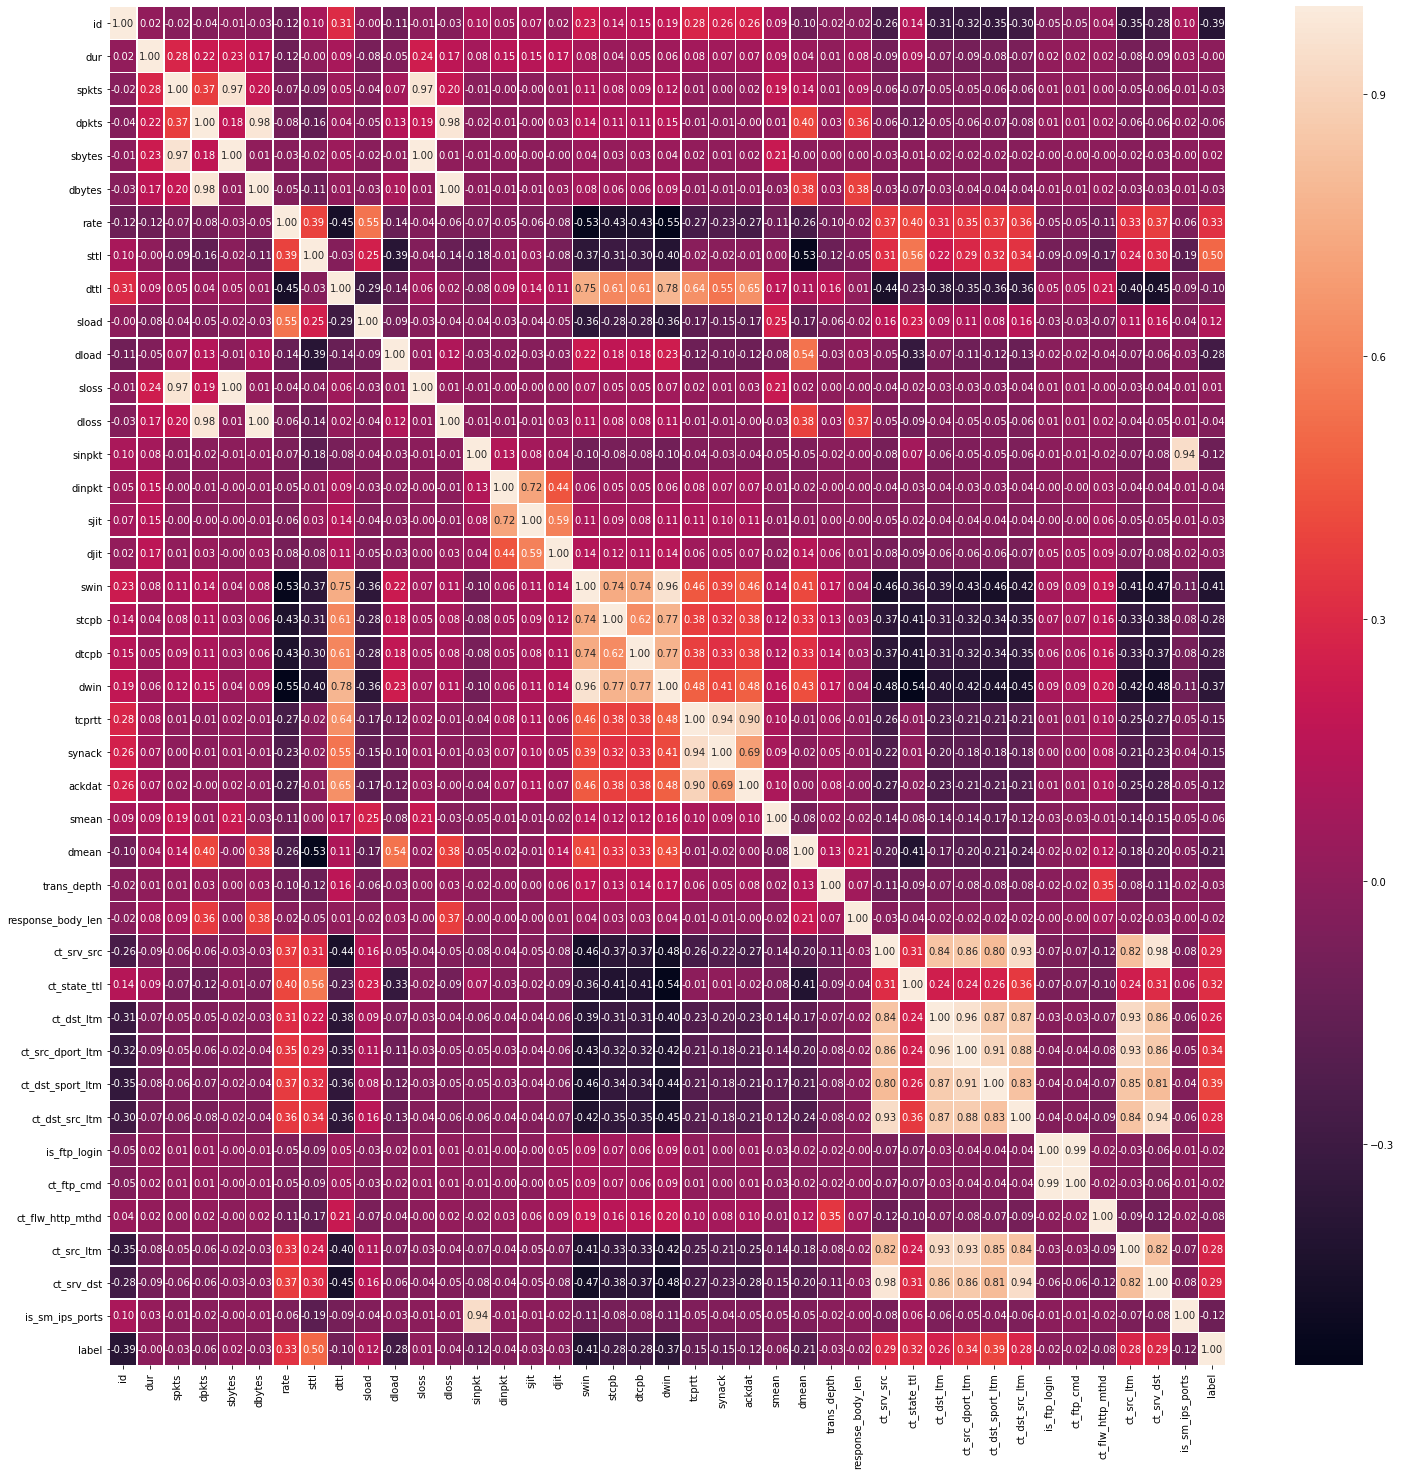

In [17]:
# look at the correlation between columns:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

In [18]:
# look at the top 10 correlation between label attack and other columns:
np.abs(df.corr())[['label']].sort_values(by='label', ascending=False).head(10)

,label
label,1.000000
sttl,0.504159
swin,0.414504
ct_dst_sport_ltm,0.393668
id,0.387489
dwin,0.369257
ct_src_dport_ltm,0.341513
rate,0.328629
ct_state_ttl,0.318517
ct_srv_dst,0.292931


In [19]:
# Findout numeric columns:

numeric_columns = df.select_dtypes(exclude=['object']).columns
print('Number of numeric columns is {}'.format(len(numeric_columns)))

Number of numeric columns is 41


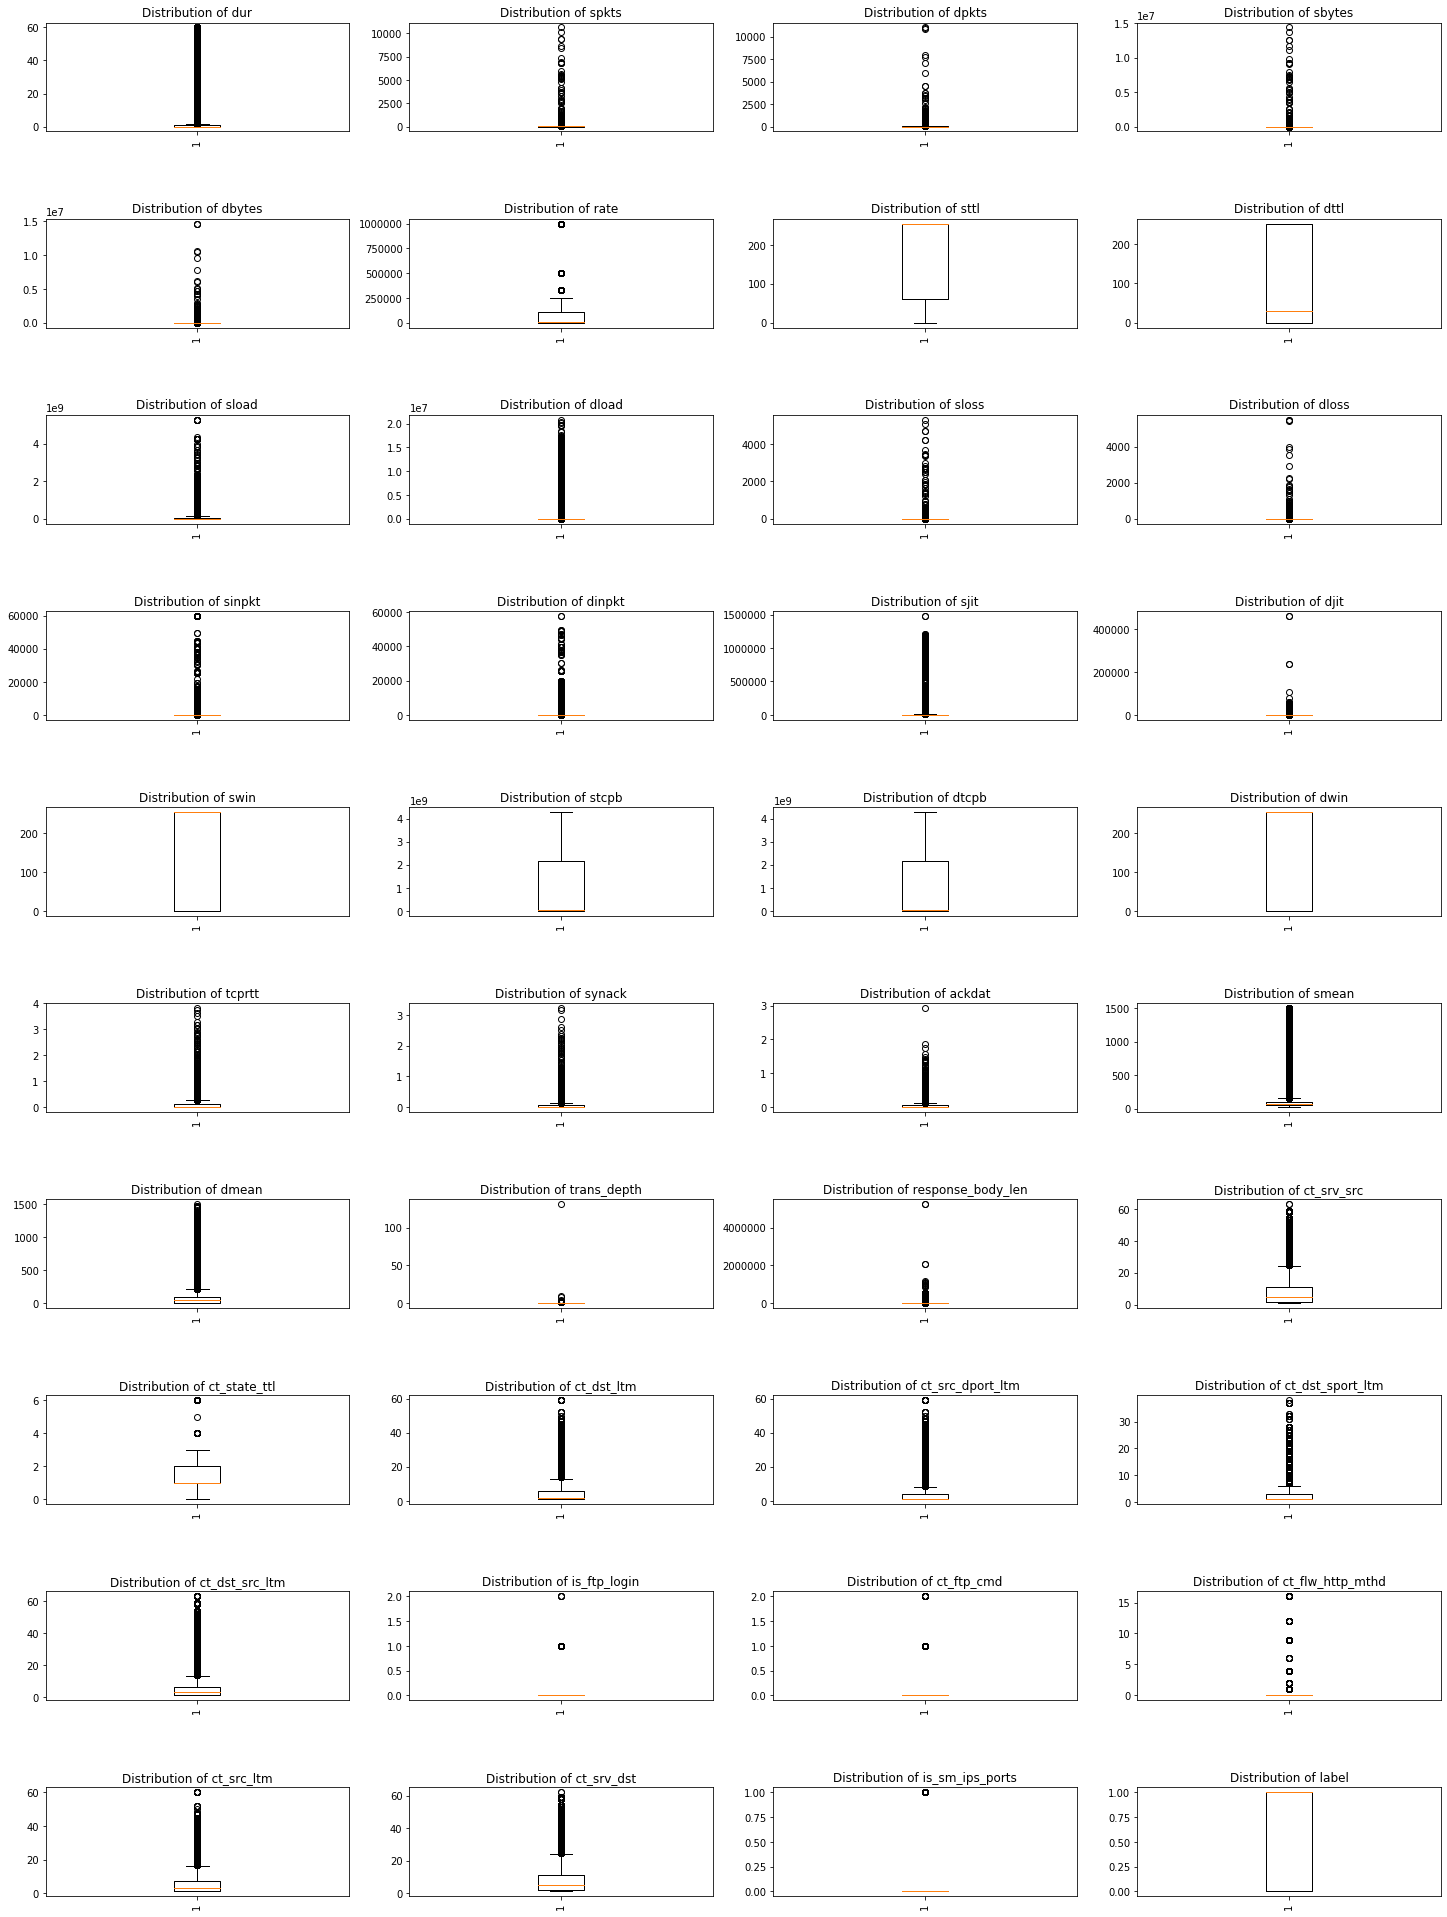

In [20]:
# Univariate visualization of continuous variables by using hist:

plt.figure(figsize=(25,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(11, 4, i+1)
    plt.boxplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As you can see, most of the columns have outlier in one side.

In [21]:
# Findout non_numeric columns:

nonnumeric_columns = df.select_dtypes(['object']).columns
print('Number of non_numeric columns is {}'.format(len(nonnumeric_columns)))

Number of non_numeric columns is 4


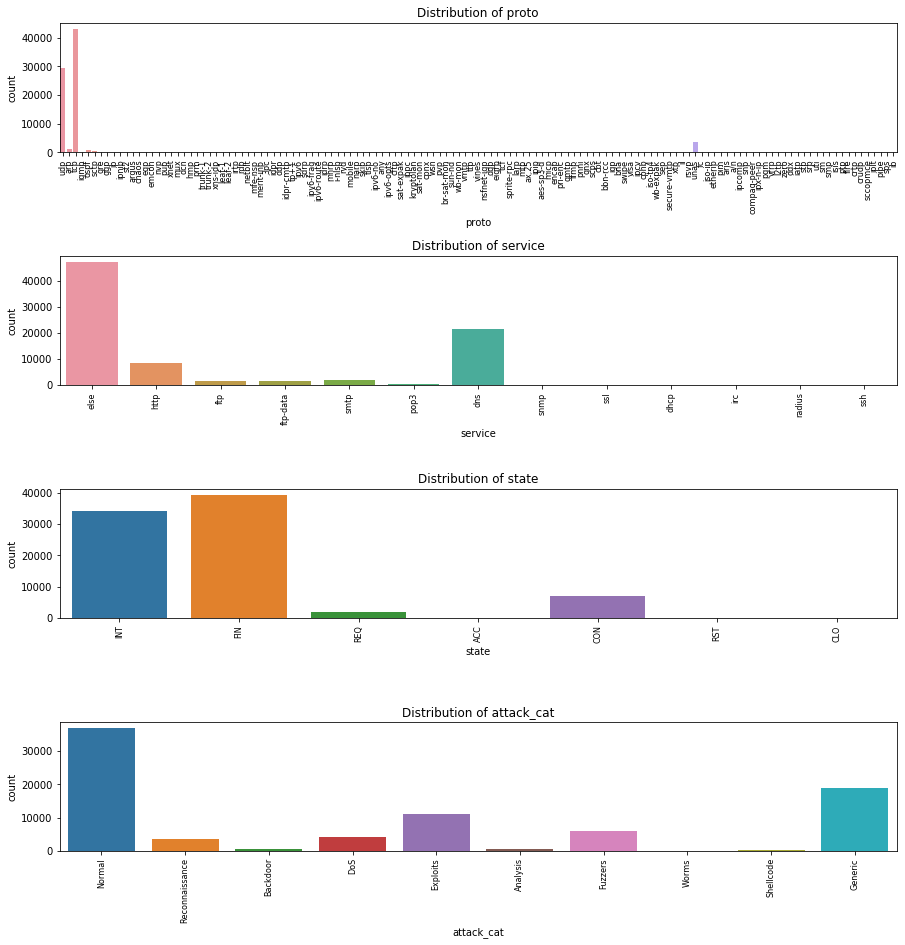

In [22]:
# Univariate visualization of categorical variables by barplot:

plt.figure(figsize=(15,20))
for i,col in enumerate(nonnumeric_columns):
    plt.subplot(4, 1, i+1)
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

**Most Common:** 

- TCP and UDP are most common protocols were used in the dataset, also TCP was used more than UDP. 

- DNS and other services are most common services were used, also other services used more than DNS.

- INT and FIN are most common states were used and FIN was used more.

- The number of Normal records is greater than Attack records. 

- The most common Attack was occured in the dataset is Generic and then Exploits. 



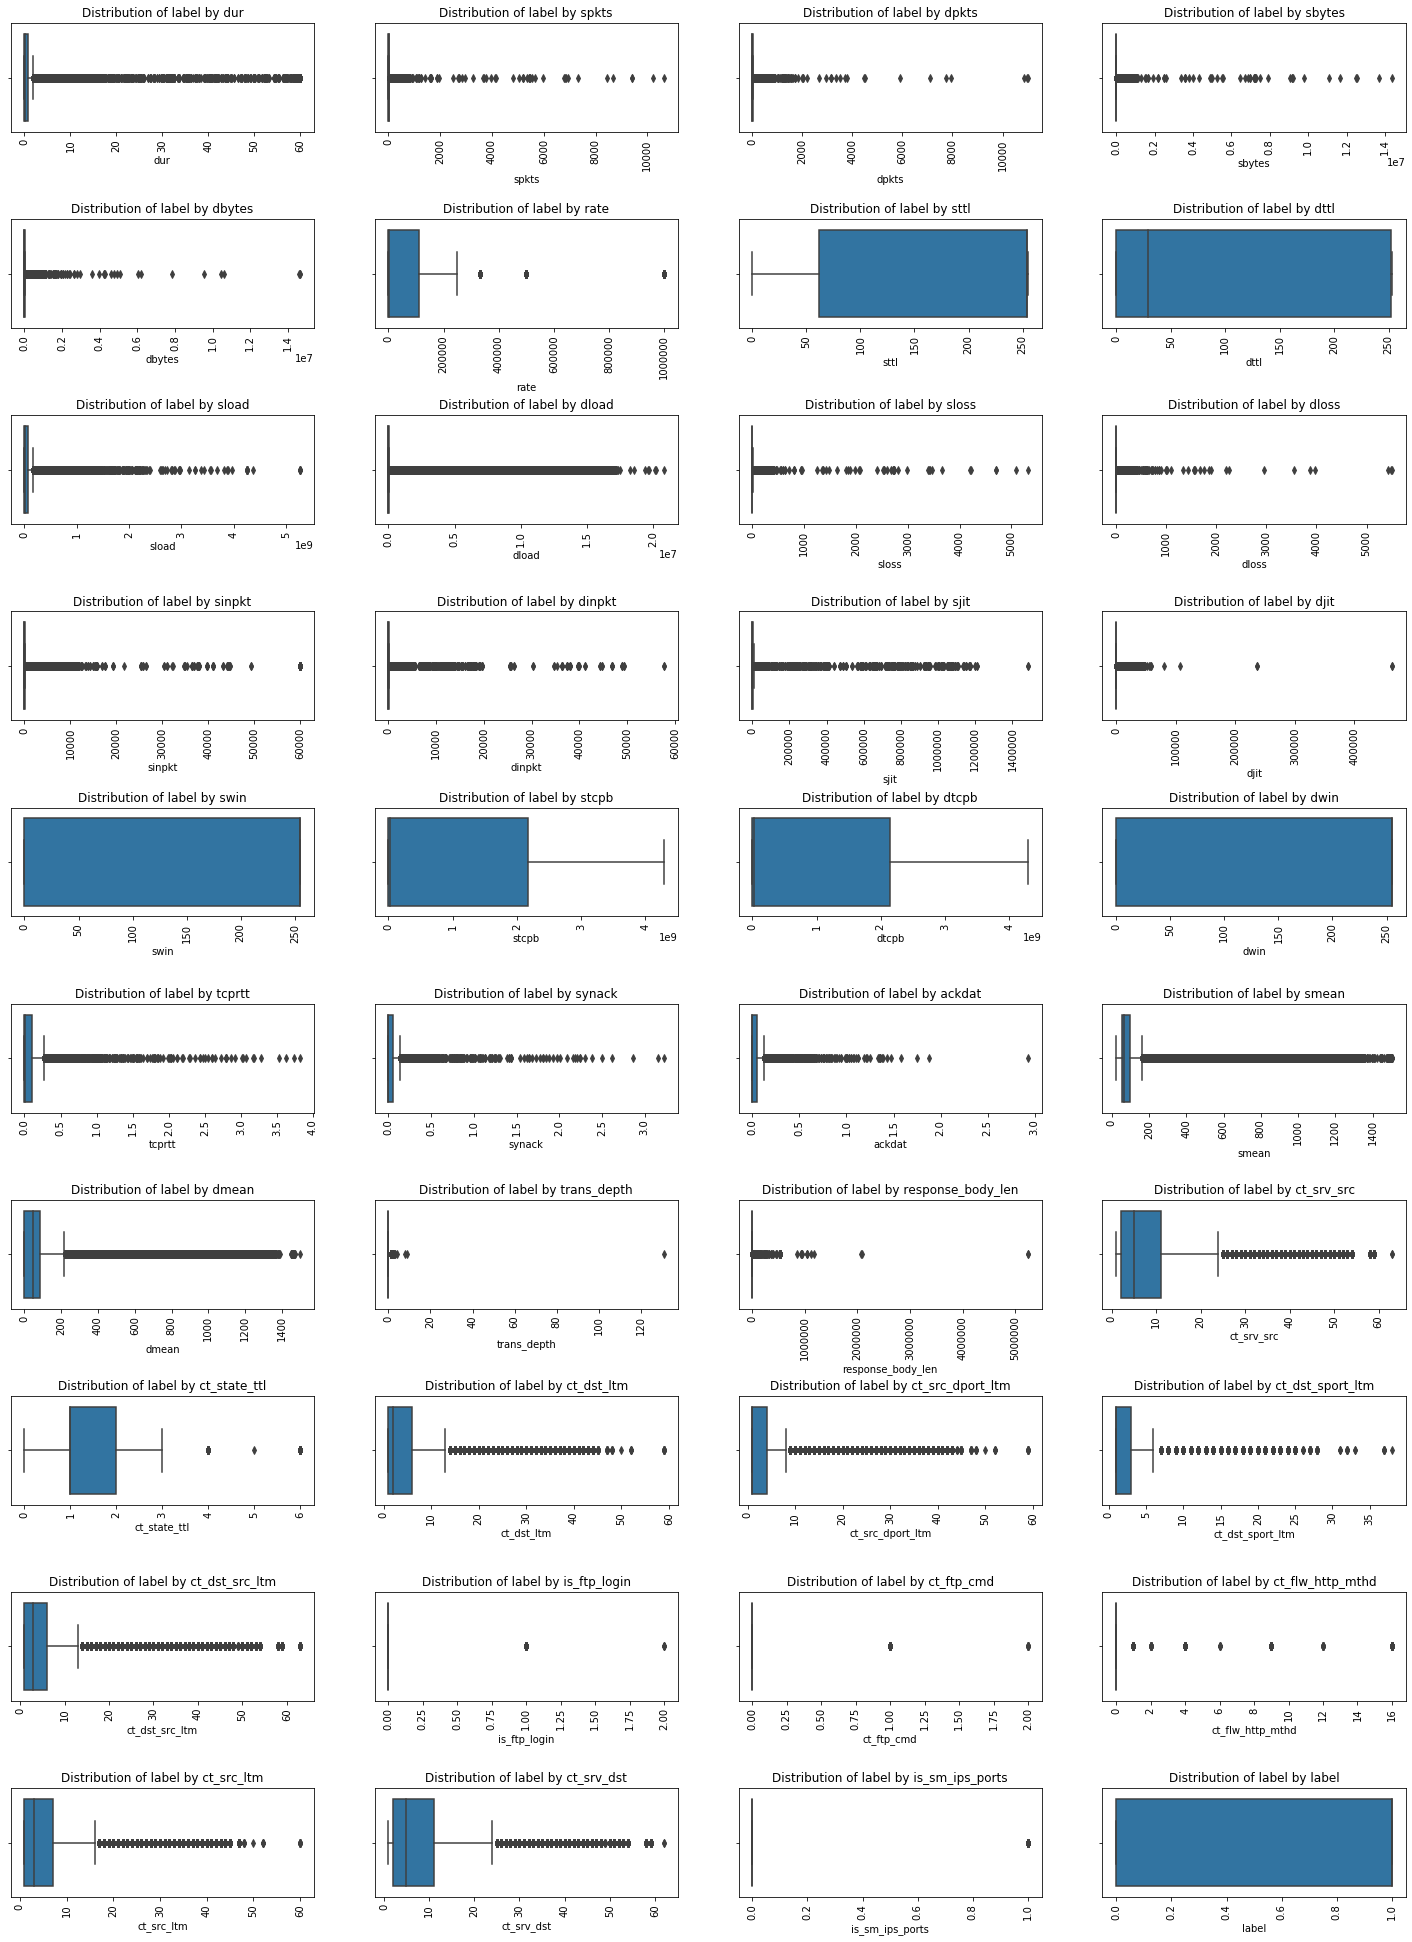

In [23]:
# Bivariate analysis of continuous variables by scatter plot:

plt.figure(figsize=(25,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(11, 4, i+1)
    sns.boxplot(x=df[col], hue=df['label'], data=df)
    plt.title(f'Distribution of label by {col}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

Here, we can see distribution of all variables with target variable.

In [24]:
# Keep top 6 protocols were used:
df['proto'].value_counts()[:6].sum()/df.shape[0]*100
proto_other_lst = list(df['proto'].value_counts()[7:].index)
df['proto'] = df['proto'].apply(lambda x: x if x not in proto_other_lst else 'other')
df['proto'].value_counts()

tcp      43095
udp      29418
other     4221
unas      3515
arp        987
ospf       676
sctp       324
any         96
Name: proto, dtype: int64

In [25]:
# make copy of dataset:
df_main = df.copy()

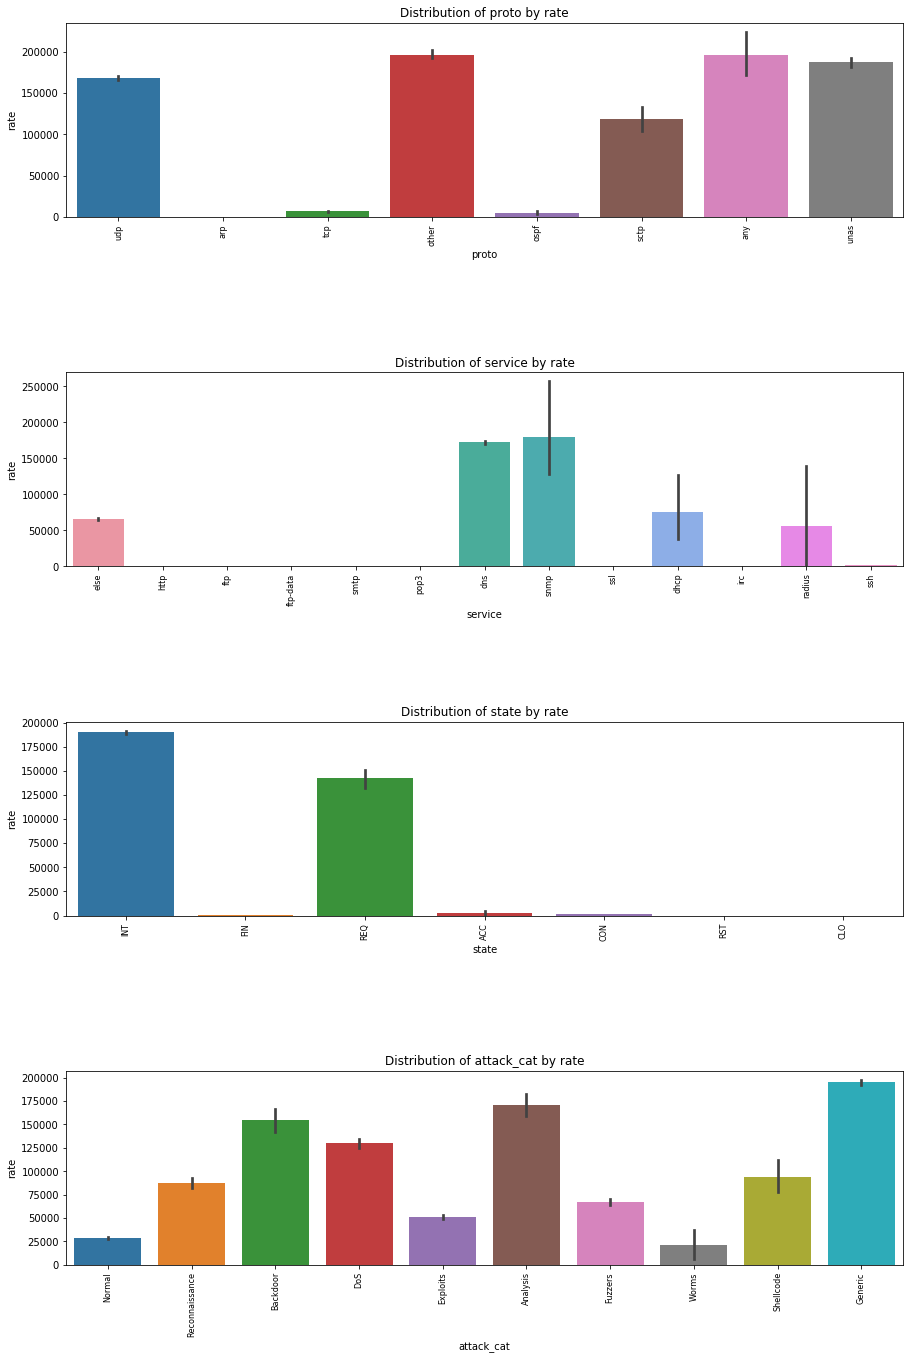

In [26]:
# Bivariate analysis of a continuous-categorical pair:

plt.figure(figsize=(15,30))
for i,col in enumerate(nonnumeric_columns):
    plt.subplot(4,1,i+1)
    sns.barplot(df[col], df['rate'])
    plt.title(f'Distribution of {col} by rate')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

- Minimum rate is for TCP protocol.
- Highest rate is for SNMP servic.
- Highest rate is for INT transaction state
- Highest rate is for Generic Attack.

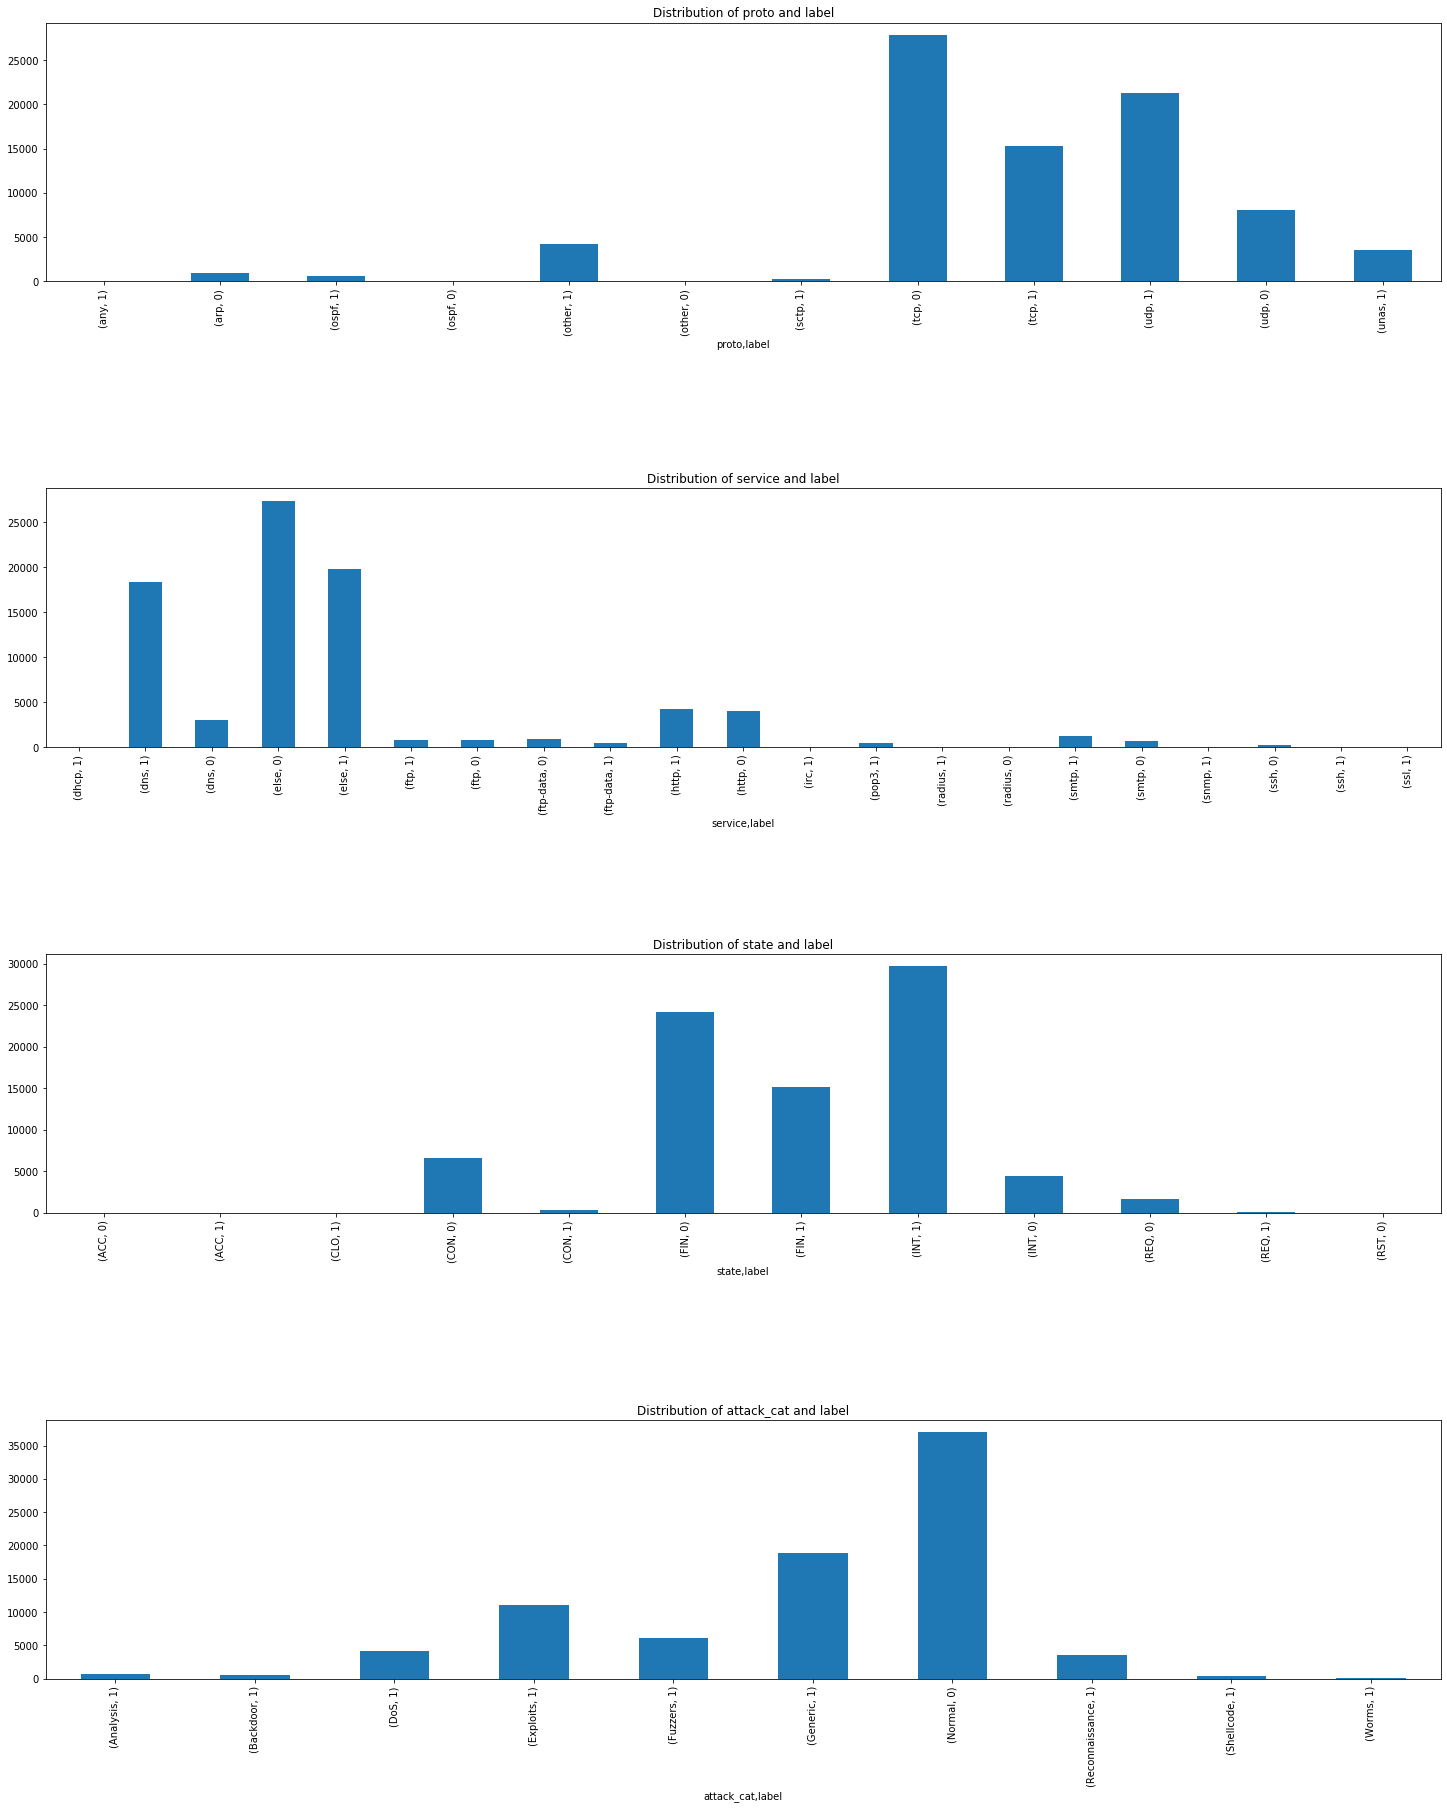

In [27]:
# Bivariate analysis of a continuous-categorical pair:

plt.figure(figsize=(25,40))
for i,col in enumerate(nonnumeric_columns):
    plt.subplot(4,1,i+1)
    df.groupby(col).label.value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col} and label')
    plt.xticks(rotation=90, fontsize=10)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()


**Most common protocol, service, state:**
- In TCP and UDP protocol, number of Normal records is  greater thann Attack records.
- Most common protocol for Attack is UDP.
- Most common servic for Attack is DNS.
- Most common state for Attack is INT.
- The number of Normal records in other services is greater than Attack records. But in DNS the numbr of Attack records is greater than normal.
- The number of Attack records in INT state is greater then Normal. But in FIN the number of Normal records is greater than Attack records. 
- The number of Normal records is highr than Attack records.
- Most common Attack is for Generic then Explotis.

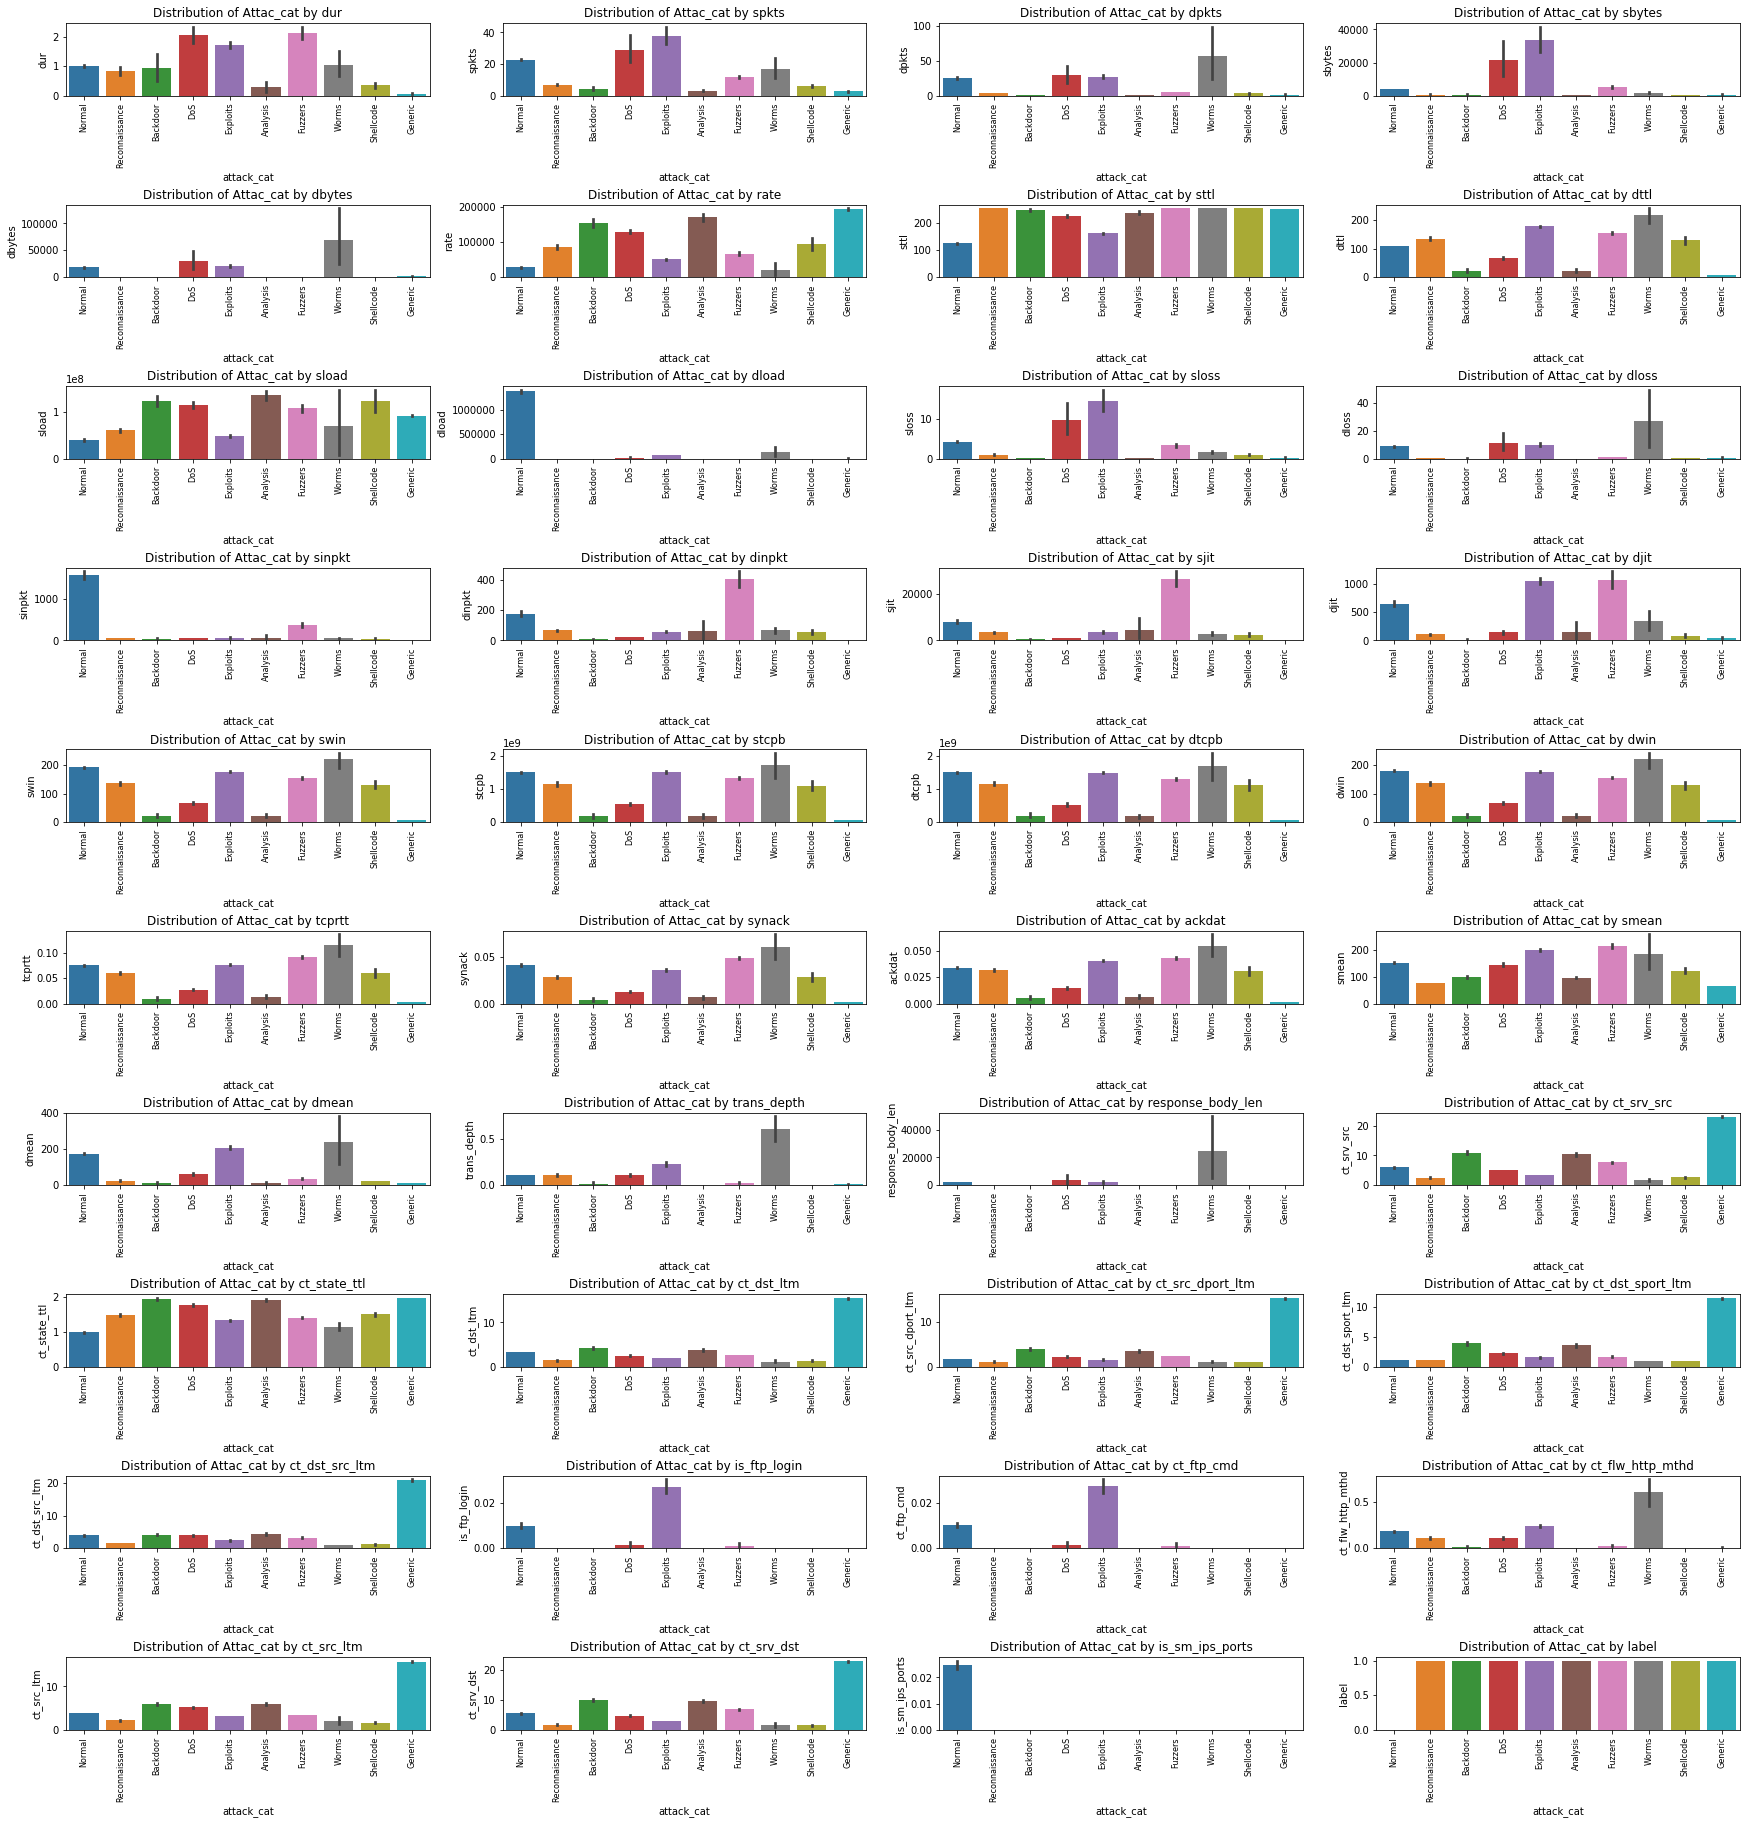

In [28]:
# Bivariate analysis of a continuous-categorical pair:
plt.figure(figsize=(30,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(12,4,i+1)
    sns.barplot(df['attack_cat'], df[col])
    plt.title(f'Distribution of Attac_cat by {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 1.5, top = 0.7)
plt.show()

-Attack:

- Dos and Fuzzers Attacks have most total duration of records.
- Exploits Attack has maximum number of packets (bytes) from source to destination.
- Worms Attack has maximum number of packets (bytes) from destination to sourc.
- Generic Attack has most total transaction packets per second.
- Normal records have lowest time to live value from Source to destination.
- Worms Aattack has longest time to live value from destination to source.
- Normal records have minimum source bits per second, but for destination have maximum.
- Exploits Attack has maximum number of source packets retransmitted or dropped. 
- Worms Attack has maximum number of destination packets retransmitted or dropped. 
- Fuzzers and Exploits Attacks have maximum mean of the flow packet size transmitted by the src, for destination Worms Attack is maximum.

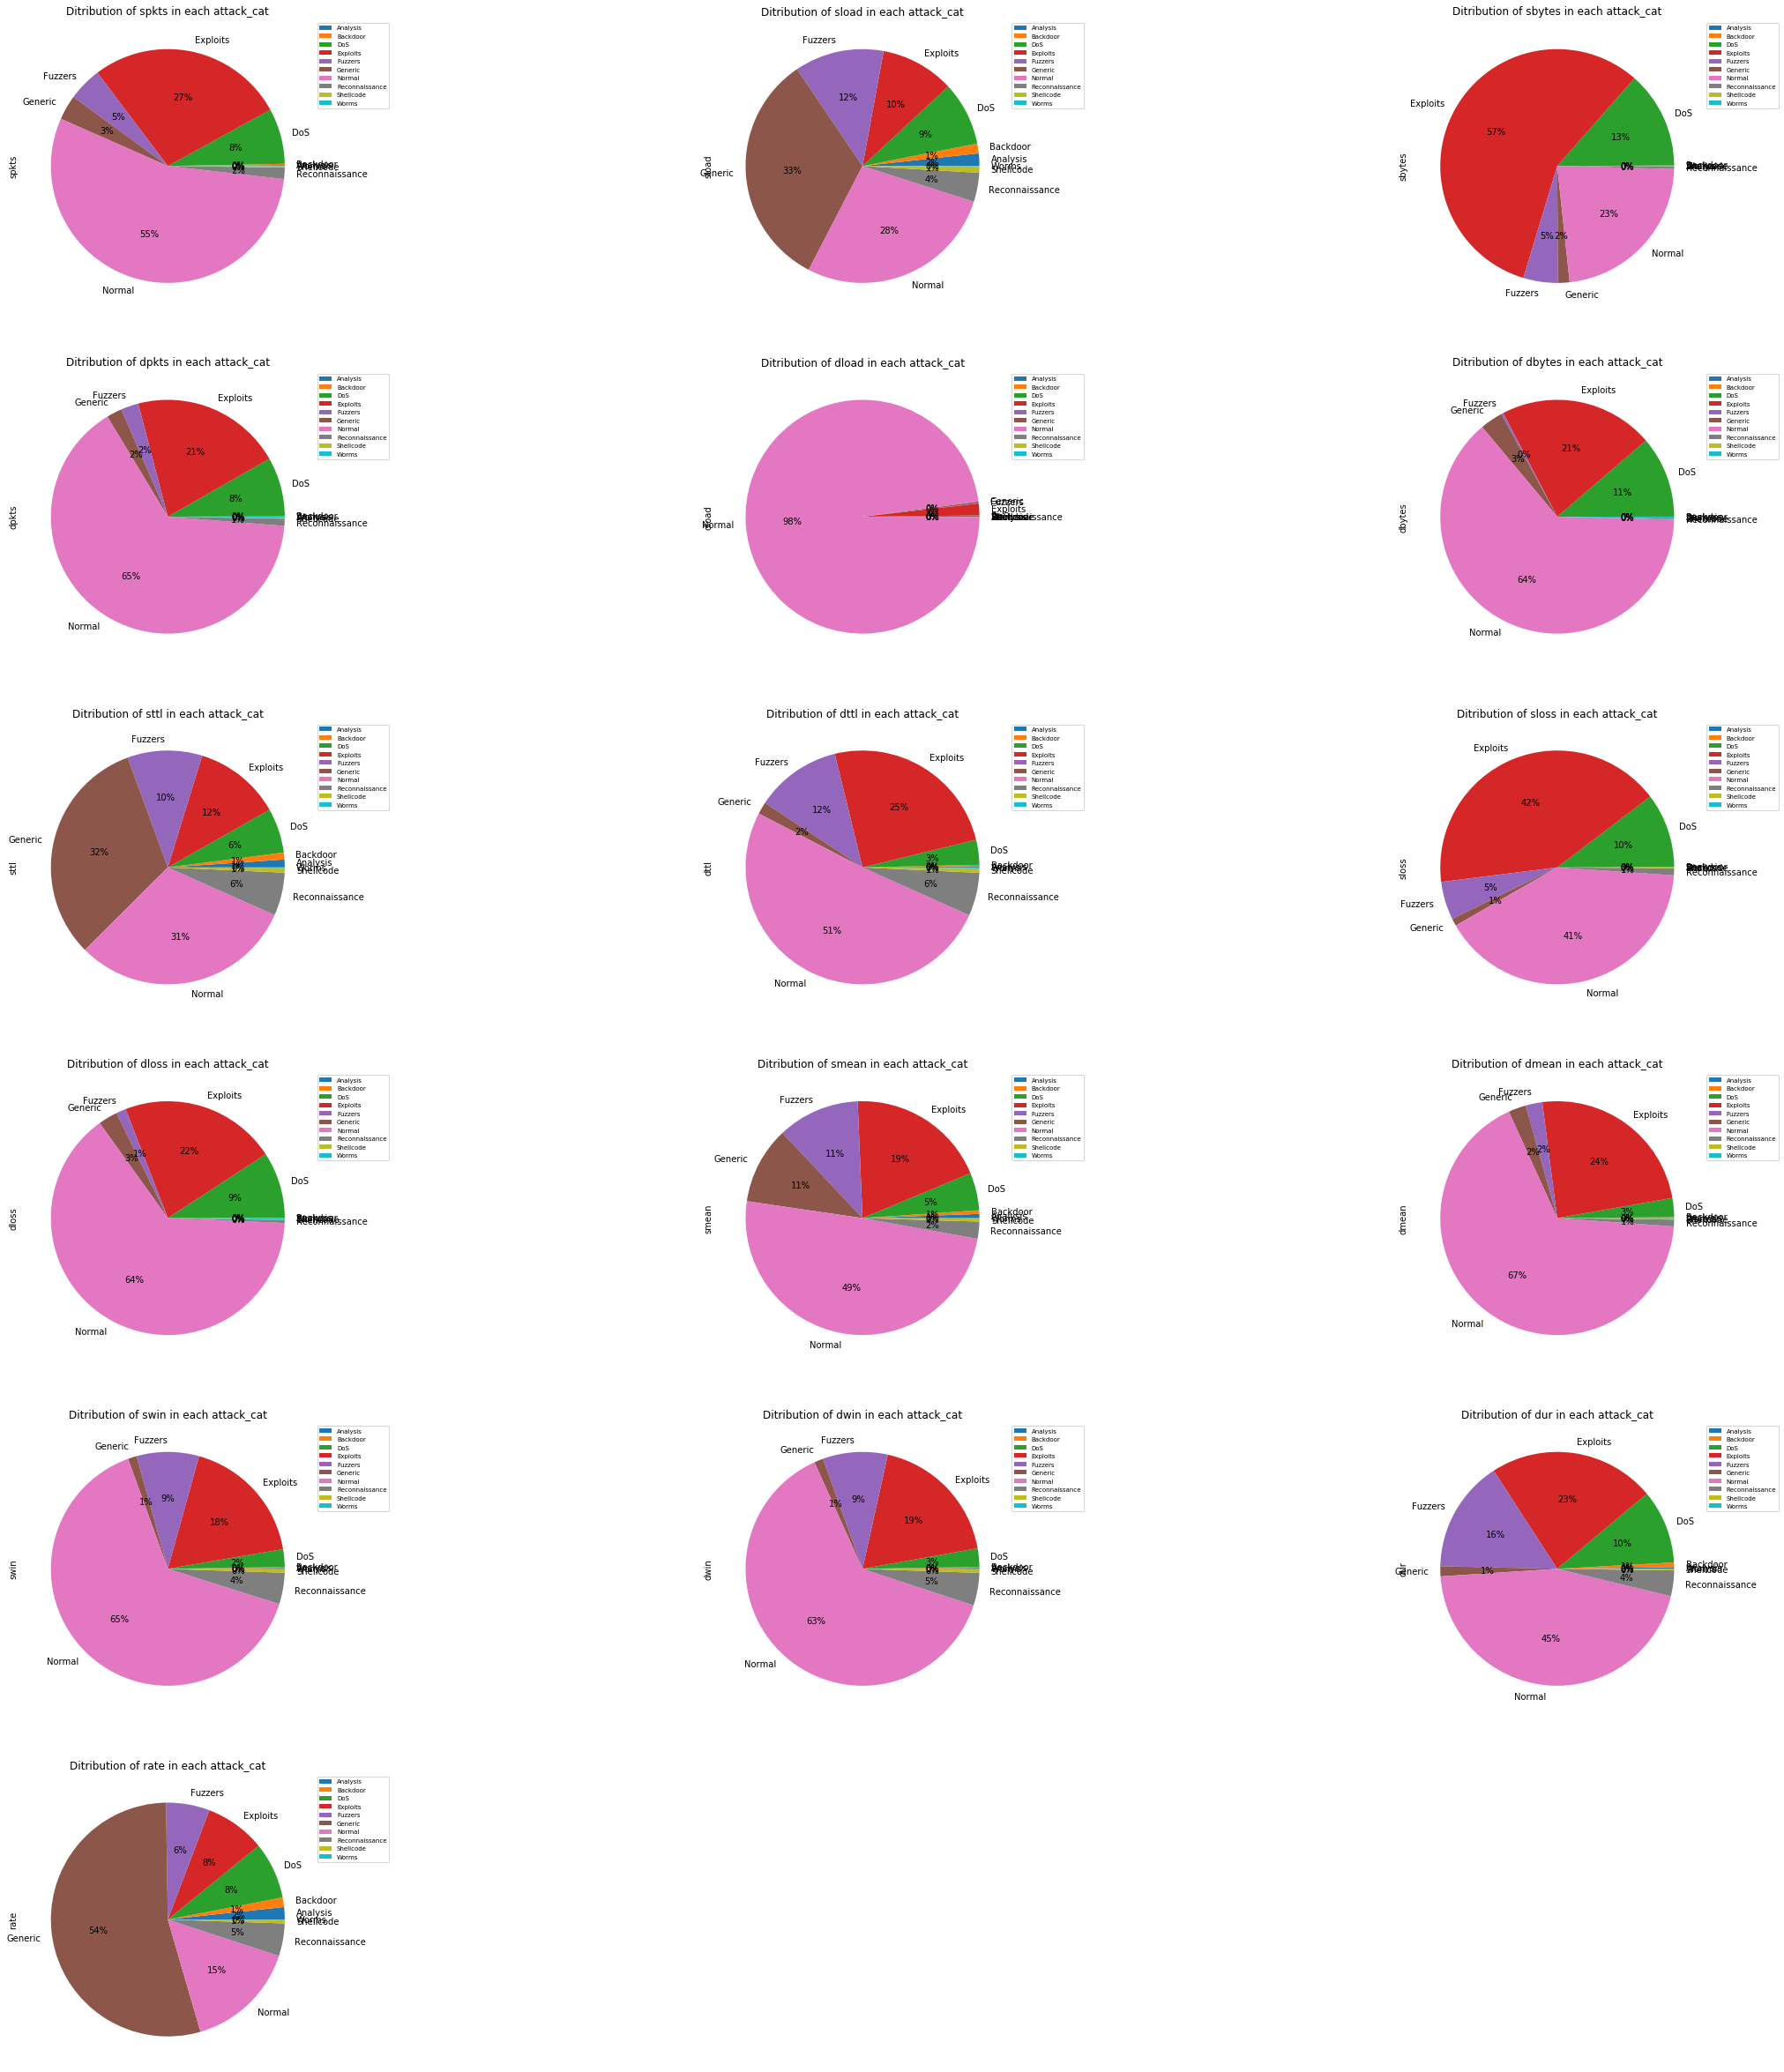

In [29]:
# Using Piechart to see distribution of source and destination in each attack_cat:

cols=['spkts','sload','sbytes','dpkts','dload','dbytes','sttl','dttl','sloss','dloss','smean','dmean','swin', 'dwin','dur','rate']
df_attack = df.groupby('attack_cat')
plt.figure(figsize=(40,50))

for i,col in enumerate(cols):
    plt.subplot(7,3,i+1)
    df_attack[col].sum().plot(kind='pie',  title=(f'Ditribution of {col} in each attack_cat'), autopct='%1.0f%%')
    labels=df_attack[col].sum().index
    plt.legend(labels=labels, loc="upper left", prop={'size': 7}, bbox_to_anchor=(1,1))
    
plt.show()

- Normal records have higher total number of packets transmitted from source to destination and conversely.
- Normal records have higher total average of the flow packet size transmitted by the src  and dst.
- Normal records have higher total destination packets retransmitted or dropped and for source both Normal records and Exploits Attack are high.
- Total number of bit seconds is high in Generic attack records for source and in destination, Normal records are high.
- Total number of bytes transaction from src to dst is high in Exploits Attack records and from dst to src is high in Normal records.
- Total value of time to live from src to dst is high in Generic Attack and Normal records, but from dst to src is high for Normal records.
- Normal records have higher total duration.
- Generic Attacks have higher total rate of packets per second in transaction.

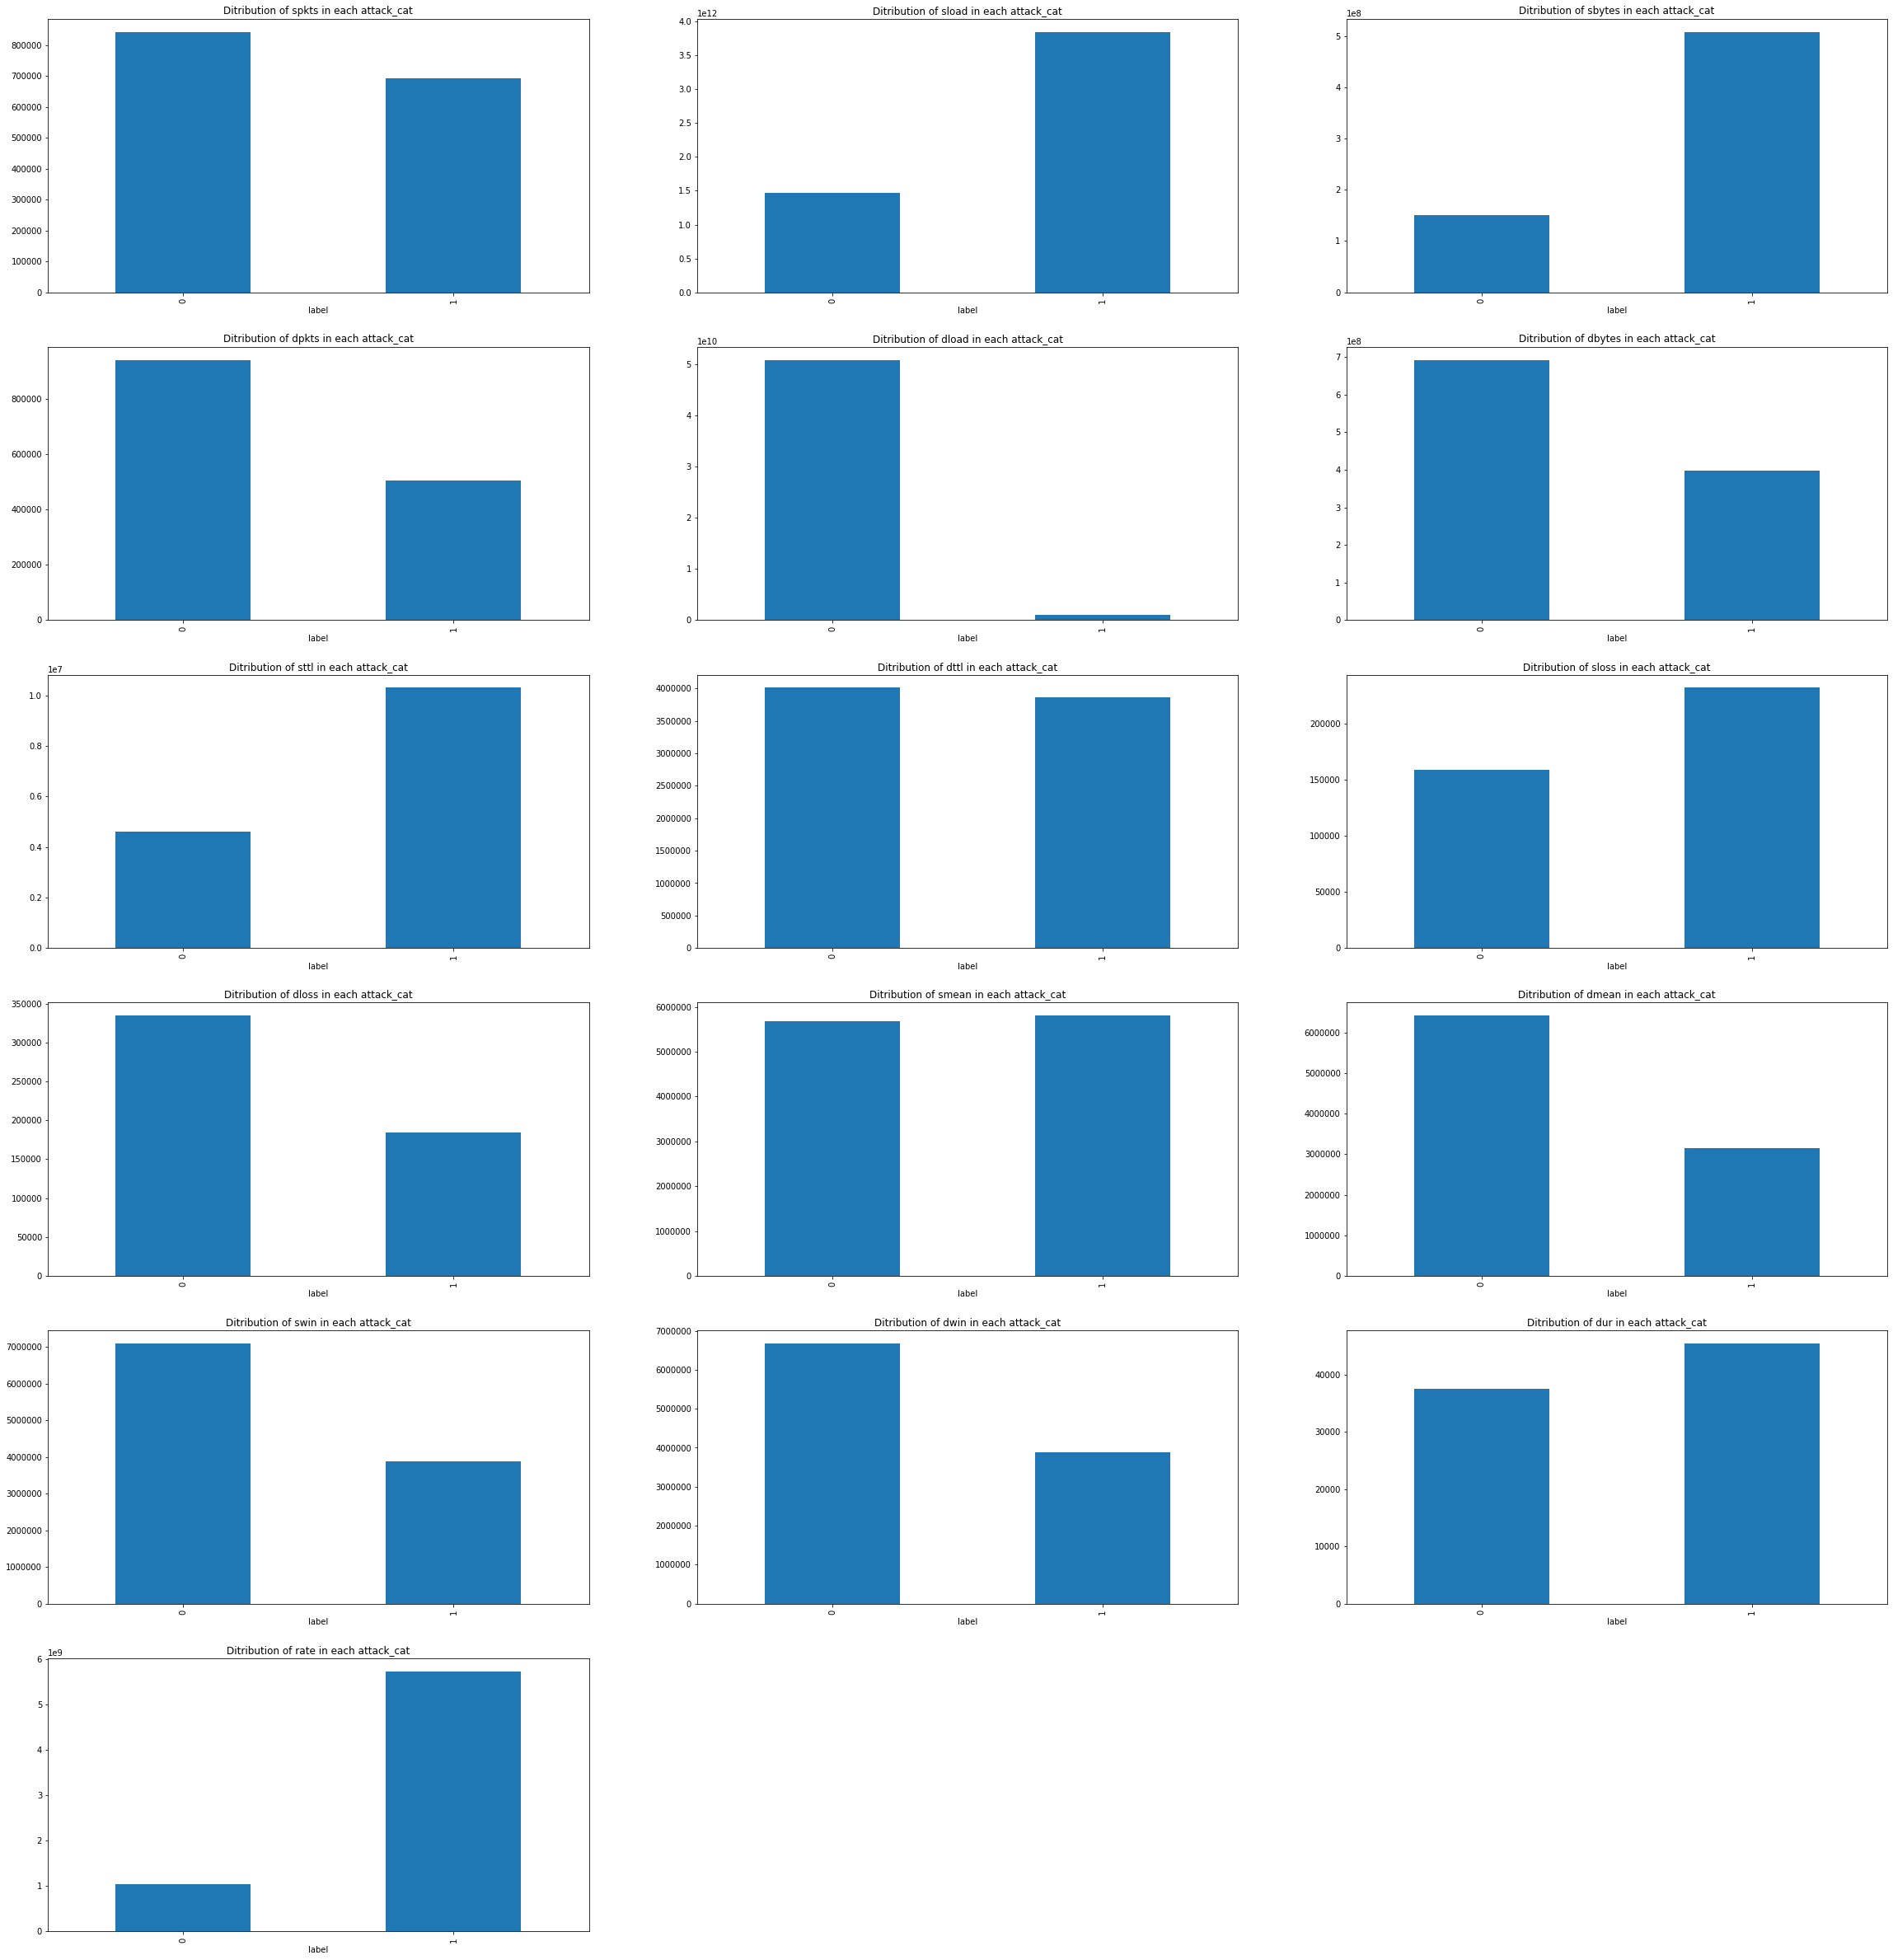

In [30]:
# Using Piechart to see distribution of source and destination in each attack_cat:

cols=['spkts','sload','sbytes','dpkts','dload','dbytes','sttl','dttl','sloss','dloss','smean','dmean','swin', 'dwin', 'dur', 'rate']
df_label = df.groupby('label')
plt.figure(figsize=(40,50))

for i,col in enumerate(cols):
    plt.subplot(7,3,i+1)
    df_label[col].sum().plot(kind='bar',  title=(f'Ditribution of {col} in each attack_cat'))
    
    
plt.show()

- The Normal label is higher in spkts, dpkts, dloss, dload, dbytes, dttl, dmean.
- The Attack lable is higher in sload, sbytes, sttl, sloss, dur, rate.
- The Normal and Attack labe have almost the same value for smean.

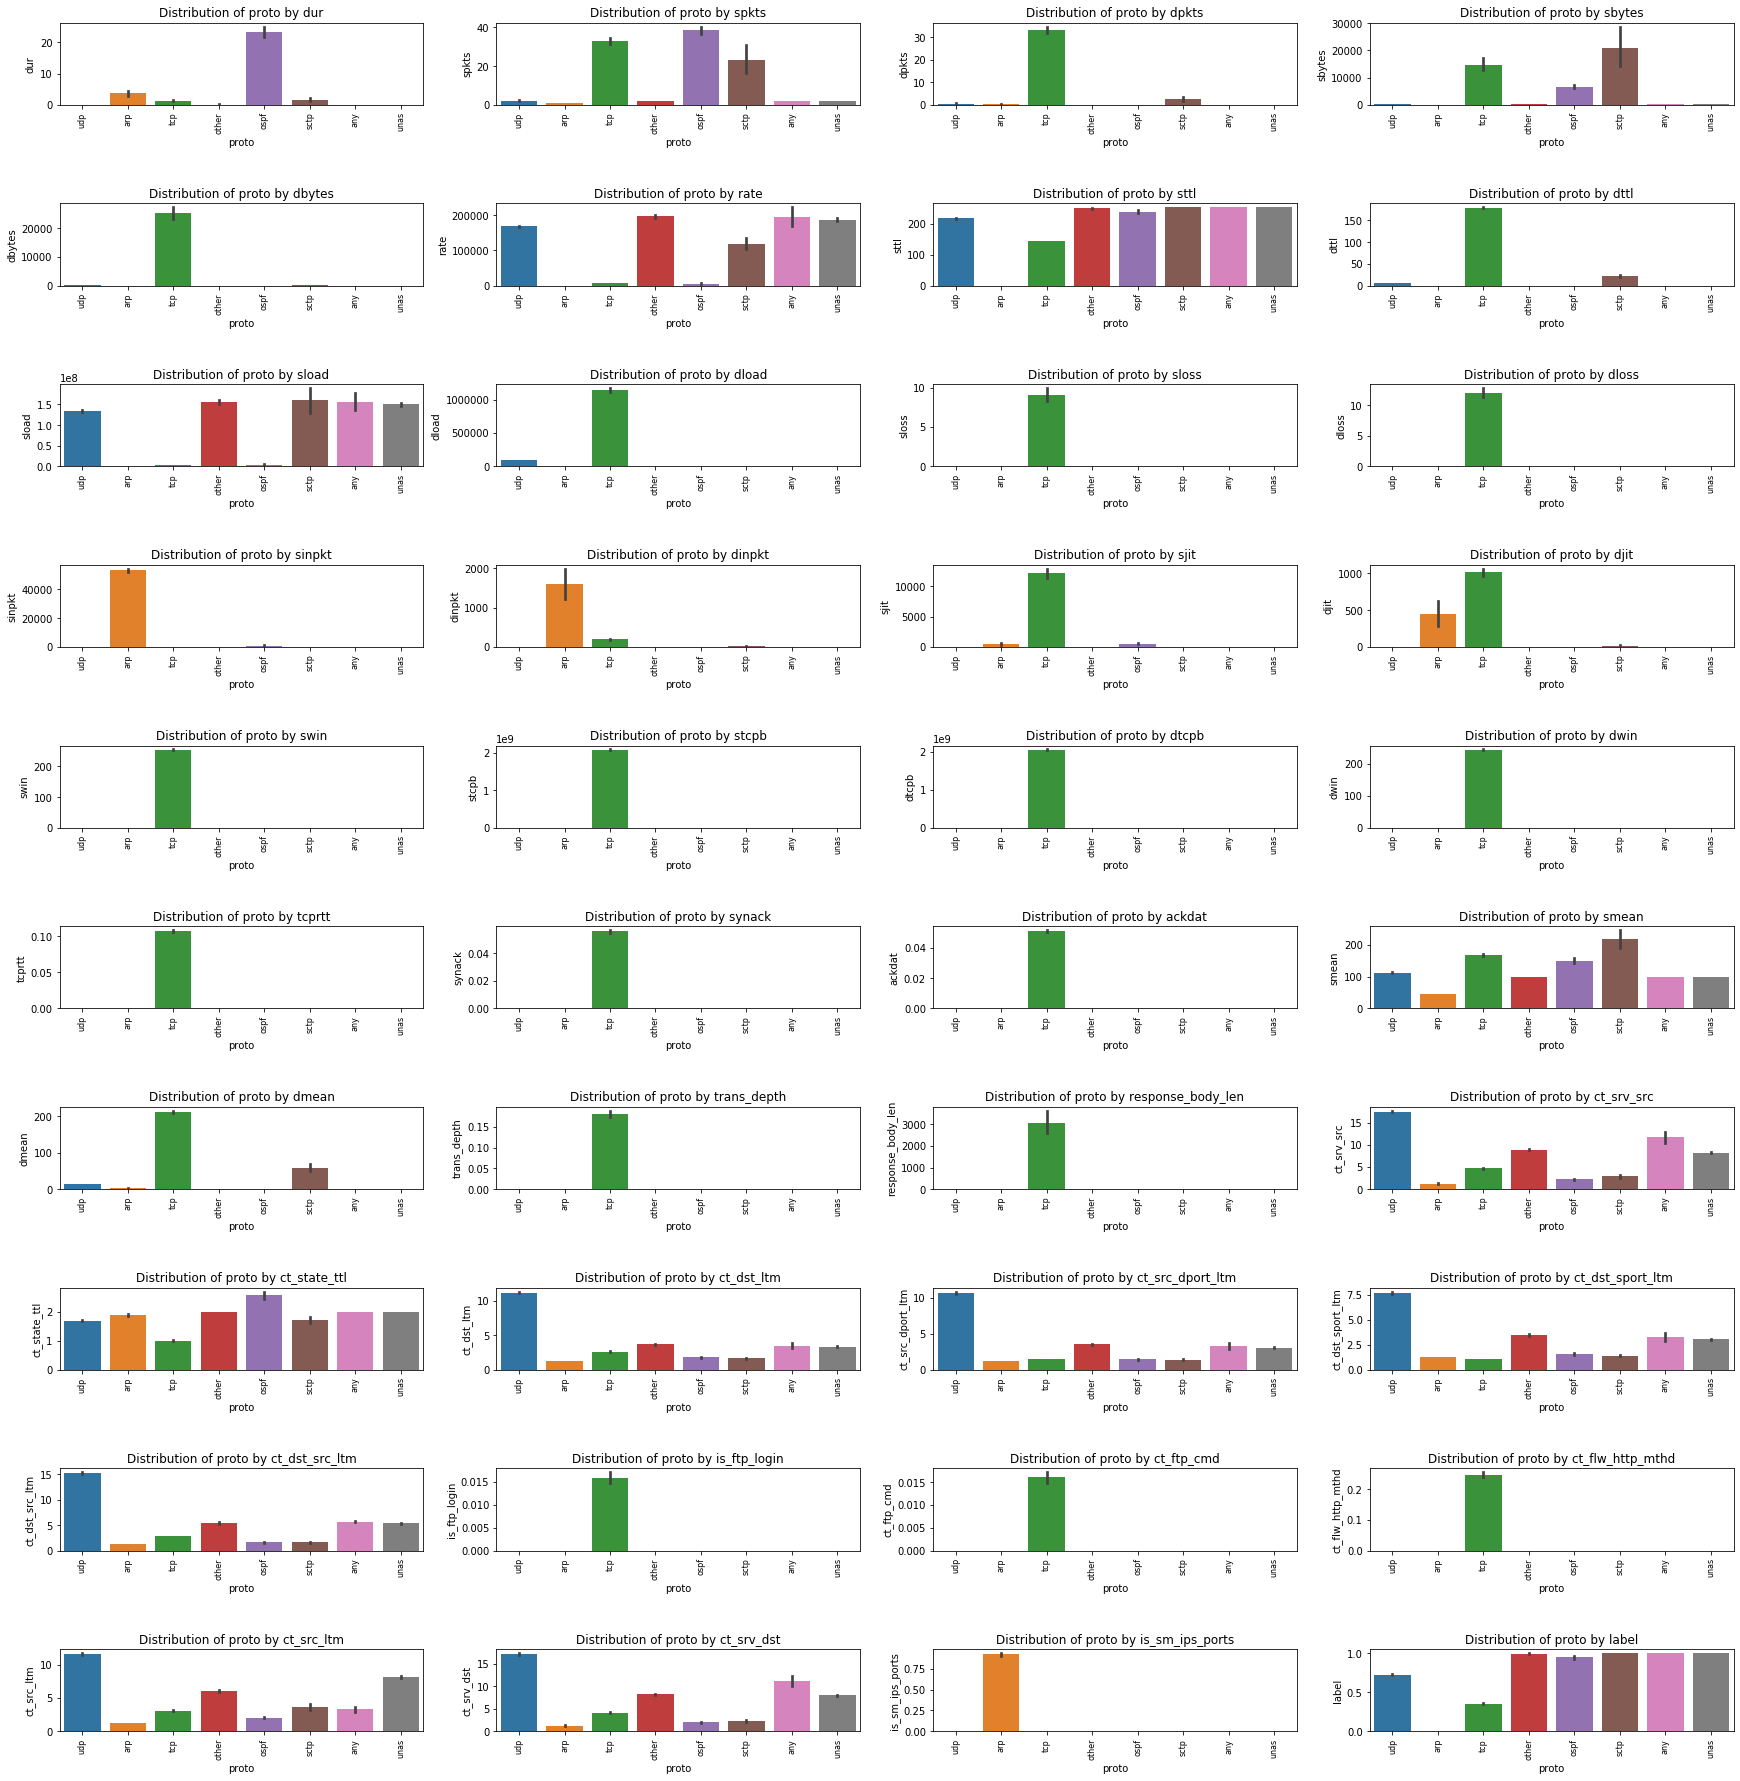

In [31]:
# Bivariate analysis of a continuous-categorical pair:
plt.figure(figsize=(30,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(12,4,i+1)
    sns.barplot(df['proto'], df[col])
    plt.title(f'Distribution of proto by {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 1.2, top = 0.7)
plt.show()

-Protocol:

- OSPF protocol has most total duration of records.
- OSPF protocol has maximum number of packets and SCTP protocol has maximum number of bytes from source to destination.
- TCP protocol has maximum number of packets (bytes) from destination to sourc.
- OSPF protocol has lowest total transaction packets per second and longest is any.
- TCp protocol has lowest time to live value from Source to destination.
- UDP protocol has lowest time to live value from destination to source.
- OSPF protocol has lowest source bits per second and SCTP protocol has the maximum.
- TCP protocol has maximum destination bits per secondbut.
- TCP  protocol has maximum number of source and destination packets retransmitted or dropped. 
- SCTP protocol has maximum mean of the flow packet size transmitted by the src, and for destination TCP protocol is the maximum.
- TCP protocol has maximum number of Normal records.
- UDP protocol has maximum number of Attack records and SCTP protocol has minimum number of Attack records.

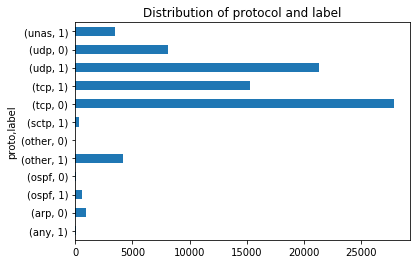

In [32]:
# Look at the distribution of protocol and label:

df.groupby('proto').label.value_counts().plot(kind='barh', title='Distribution of protocol and label')

- Highest number of Normal records is for TCP protocol.
- Highest number of Attack records is for UDP protocol.

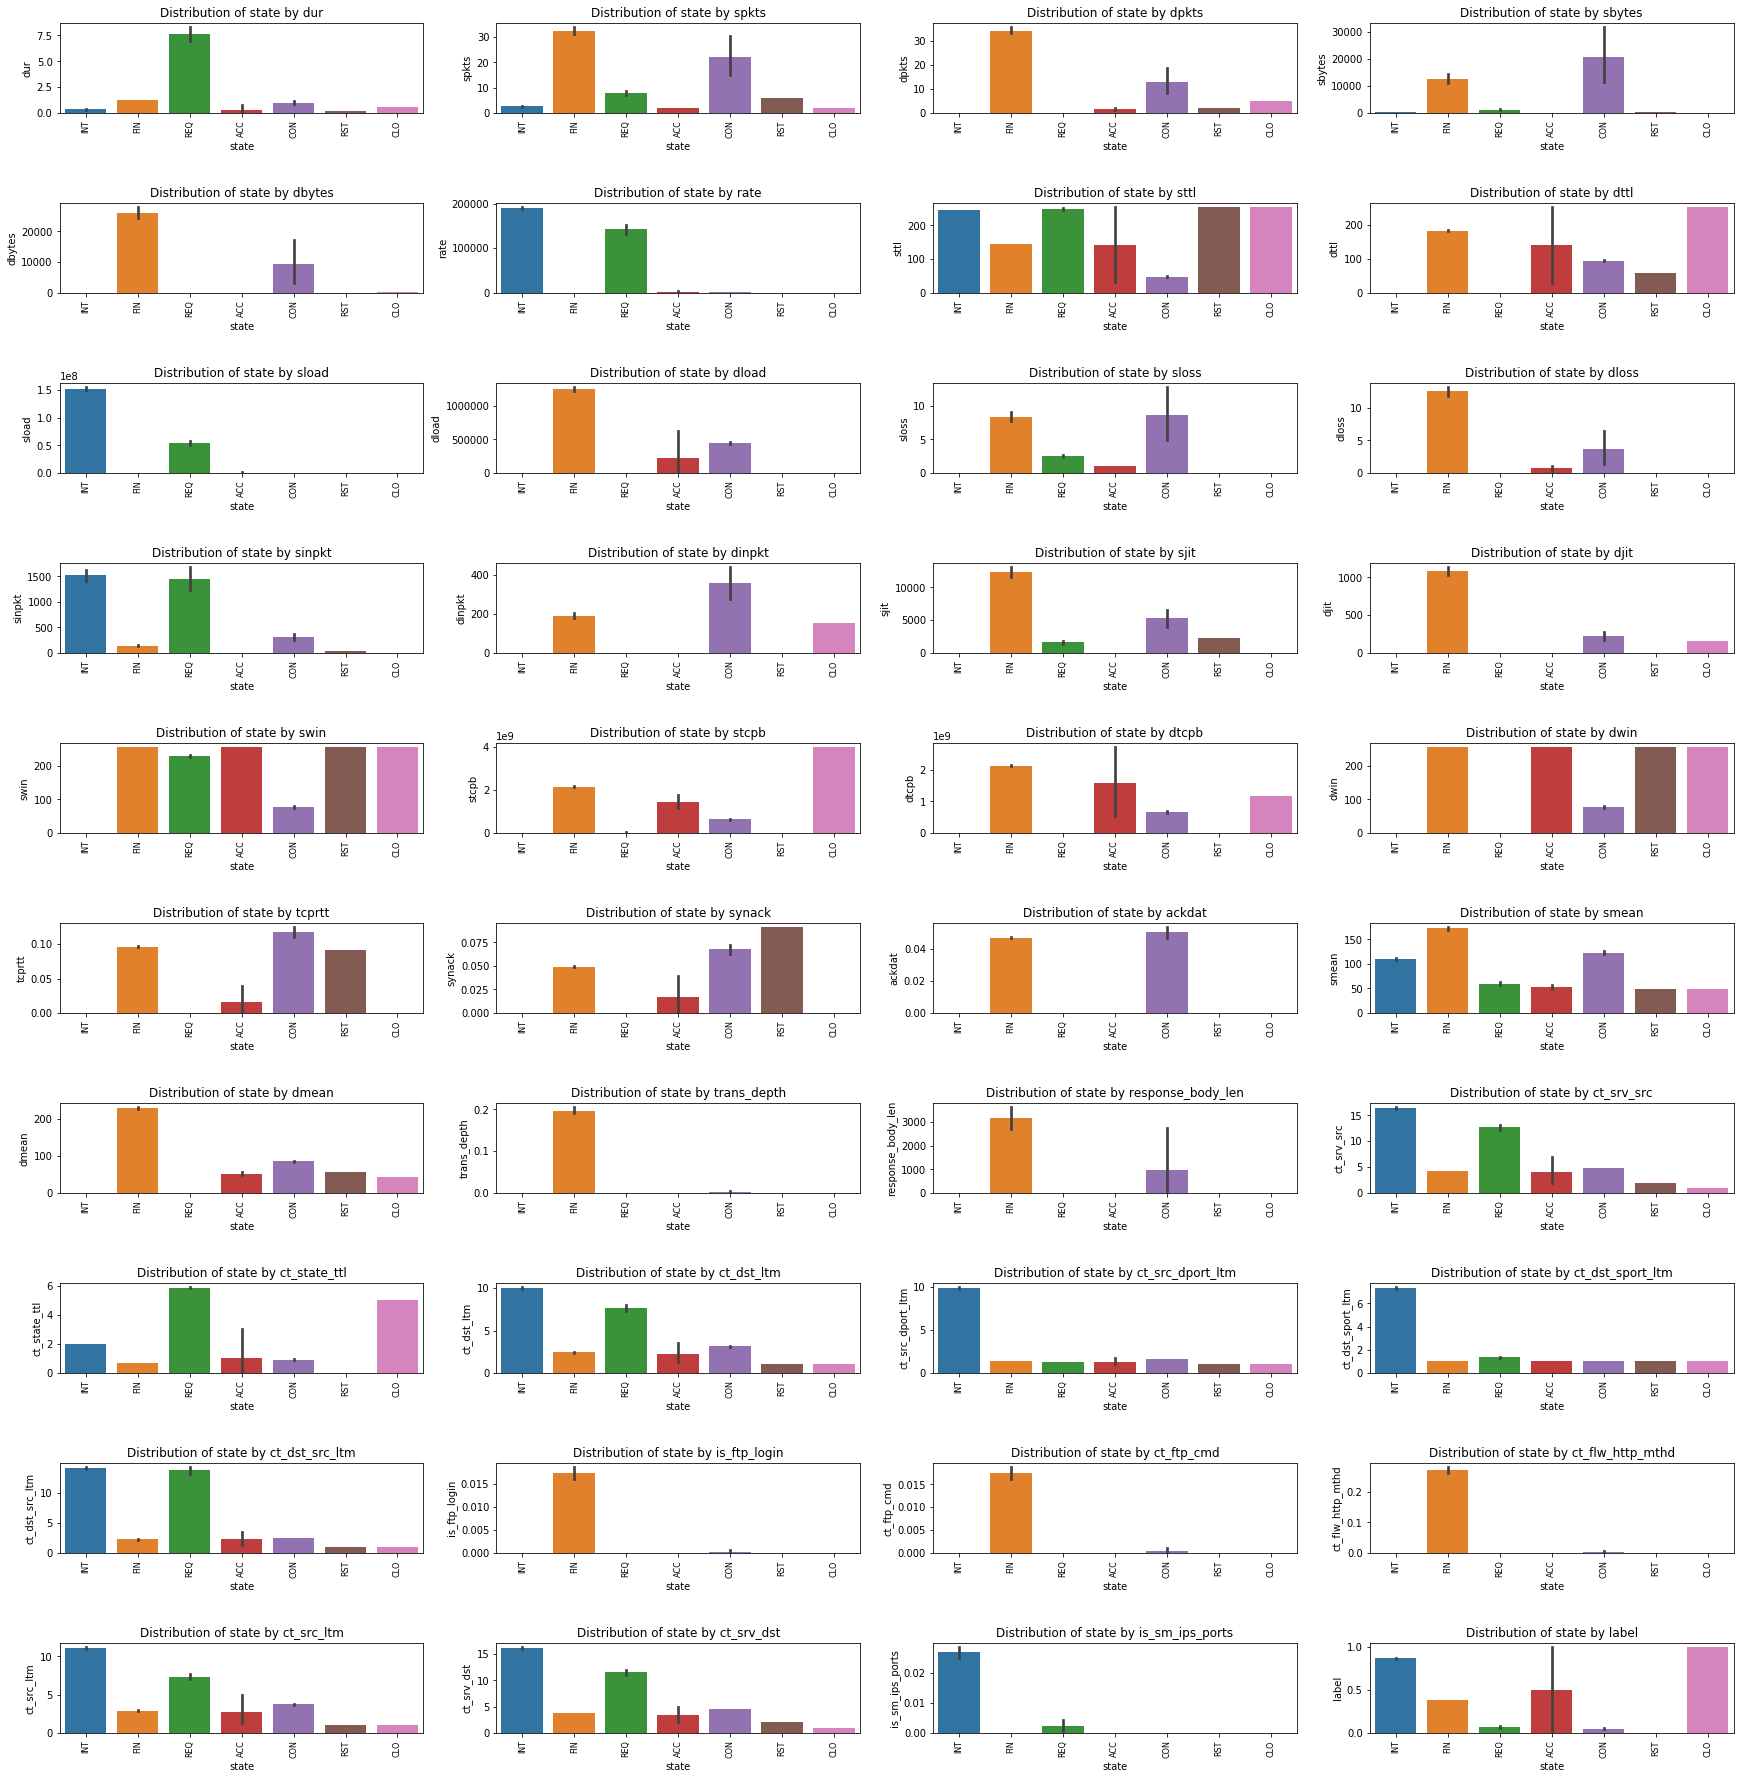

In [33]:
# Bivariate analysis of a continuous-categorical pair:
plt.figure(figsize=(30,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(12,4,i+1)
    sns.barplot(df['state'], df[col])
    plt.title(f'Distribution of state by {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 1, top = 0.7)
plt.show()

-Transaction State:

- REQ state has most total duration of records.
- FIN state has maximum number of packets and CON state has maximum number of bytes from source to destination.
- FIN state has maximum number of packets (bytes) from destination to sourc.
- INT state has Maximum total transaction packets per second and longest is any.
- CON state has lowest time to live value from Source to destination.
- CLO state has longest time to live value from destination to source and INT , REQ lowest.
- INT state has maximum source bits per second.
- FIN state has maximum destination bits per secondbut.
- CON and FIN  states have maximum number of source packets retransmitted or dropped and FIN for destination. 
- SCTP state has maximum mean of the flow packet size transmitted by the src, and for destination TCP protocol is the maximum.
- FIN state has maximum number of Normal recordsbut less than Attack records.
- INT state has maximum number of Attack records and CON, REQ, RST and ACC states have minimum number of Attack records.

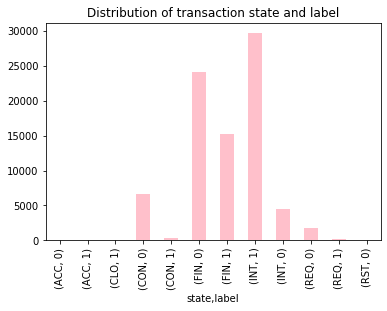

In [34]:
# Look at the distribution of transaction state and label:
df.groupby('state').label.value_counts().plot(kind='bar', color='pink', title='Distribution of transaction state and label')

- Highest transaction state is for INT in Attack records.
- Highest transaction state for normal records is FIN.

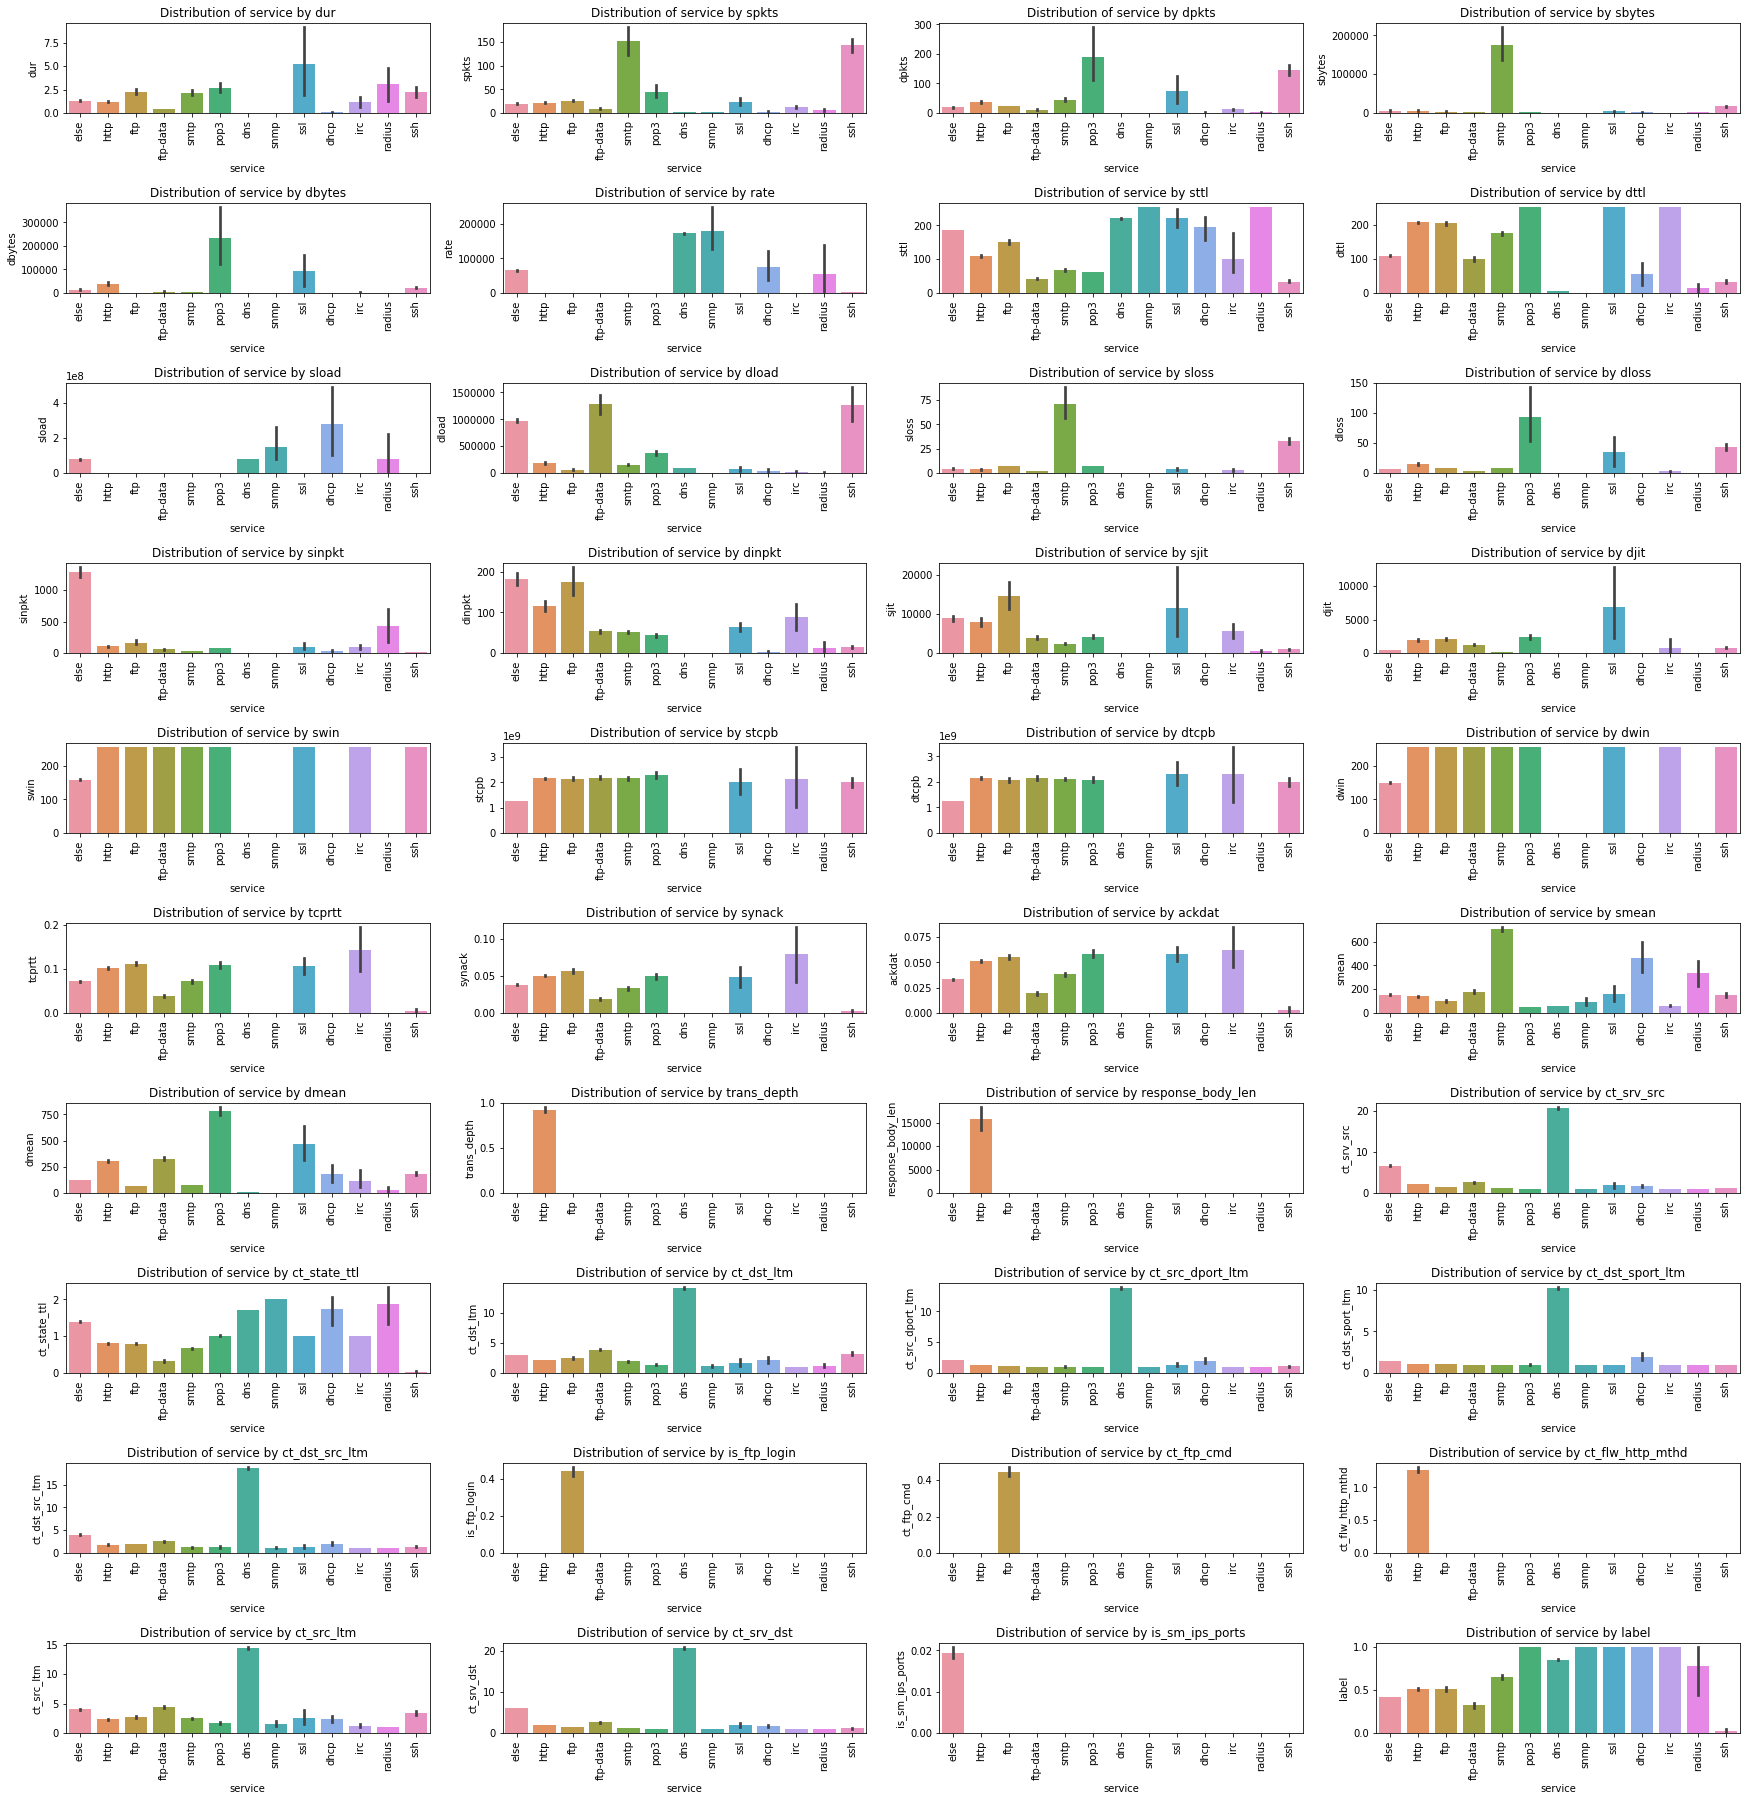

In [35]:
# Bivariate analysis of a continuous-categorical pair:
plt.figure(figsize=(30,50))
for i,col in enumerate(numeric_columns.drop('id')):
    plt.subplot(12,4,i+1)
    sns.barplot(df['service'], df[col])
    plt.title(f'Distribution of service by {col}')
    plt.xticks(rotation=90, fontsize=10)
plt.subplots_adjust(hspace = 1, top = 0.7)
plt.show()

- Service:

- SSL service has most total duration of records.
- SMTP service has maximum number of packets (bytes) from source to destination.
- POP3 service has maximum number of packets (bytes) from destination to source.
- SMTP service has maximum total transaction packets per second.
- SNMP and Radius services have longest time to live value from Source to destination and SSH service is the lowest.
- POP3, SSL and IRC services have longest time to live value from destination to source and SNMP is the lowest.
- DHCP service has maximum source bits per second.
- FTP_data service has maximum destination bits per secondbut.
- SMTP service has maximum number of source packets retransmitted or dropped. 
- POP3 service has maximum number of destination packets retransmitted or dropped.
- SMTP service has maximum mean of the flow packet size transmitted by the src, and for destination POP3 service is the maximum.
- DNS service has maximum number of Attack records.

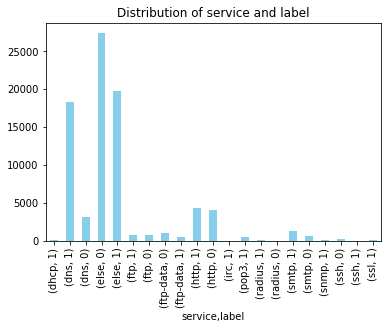

In [36]:
# Look at the distribution of service and label:
df.groupby('service').label.value_counts().plot(kind='bar', color='skyblue', title='Distribution of service and label')

- Highest service is for Normal records.
- Highest service for Aattack records is DNS.

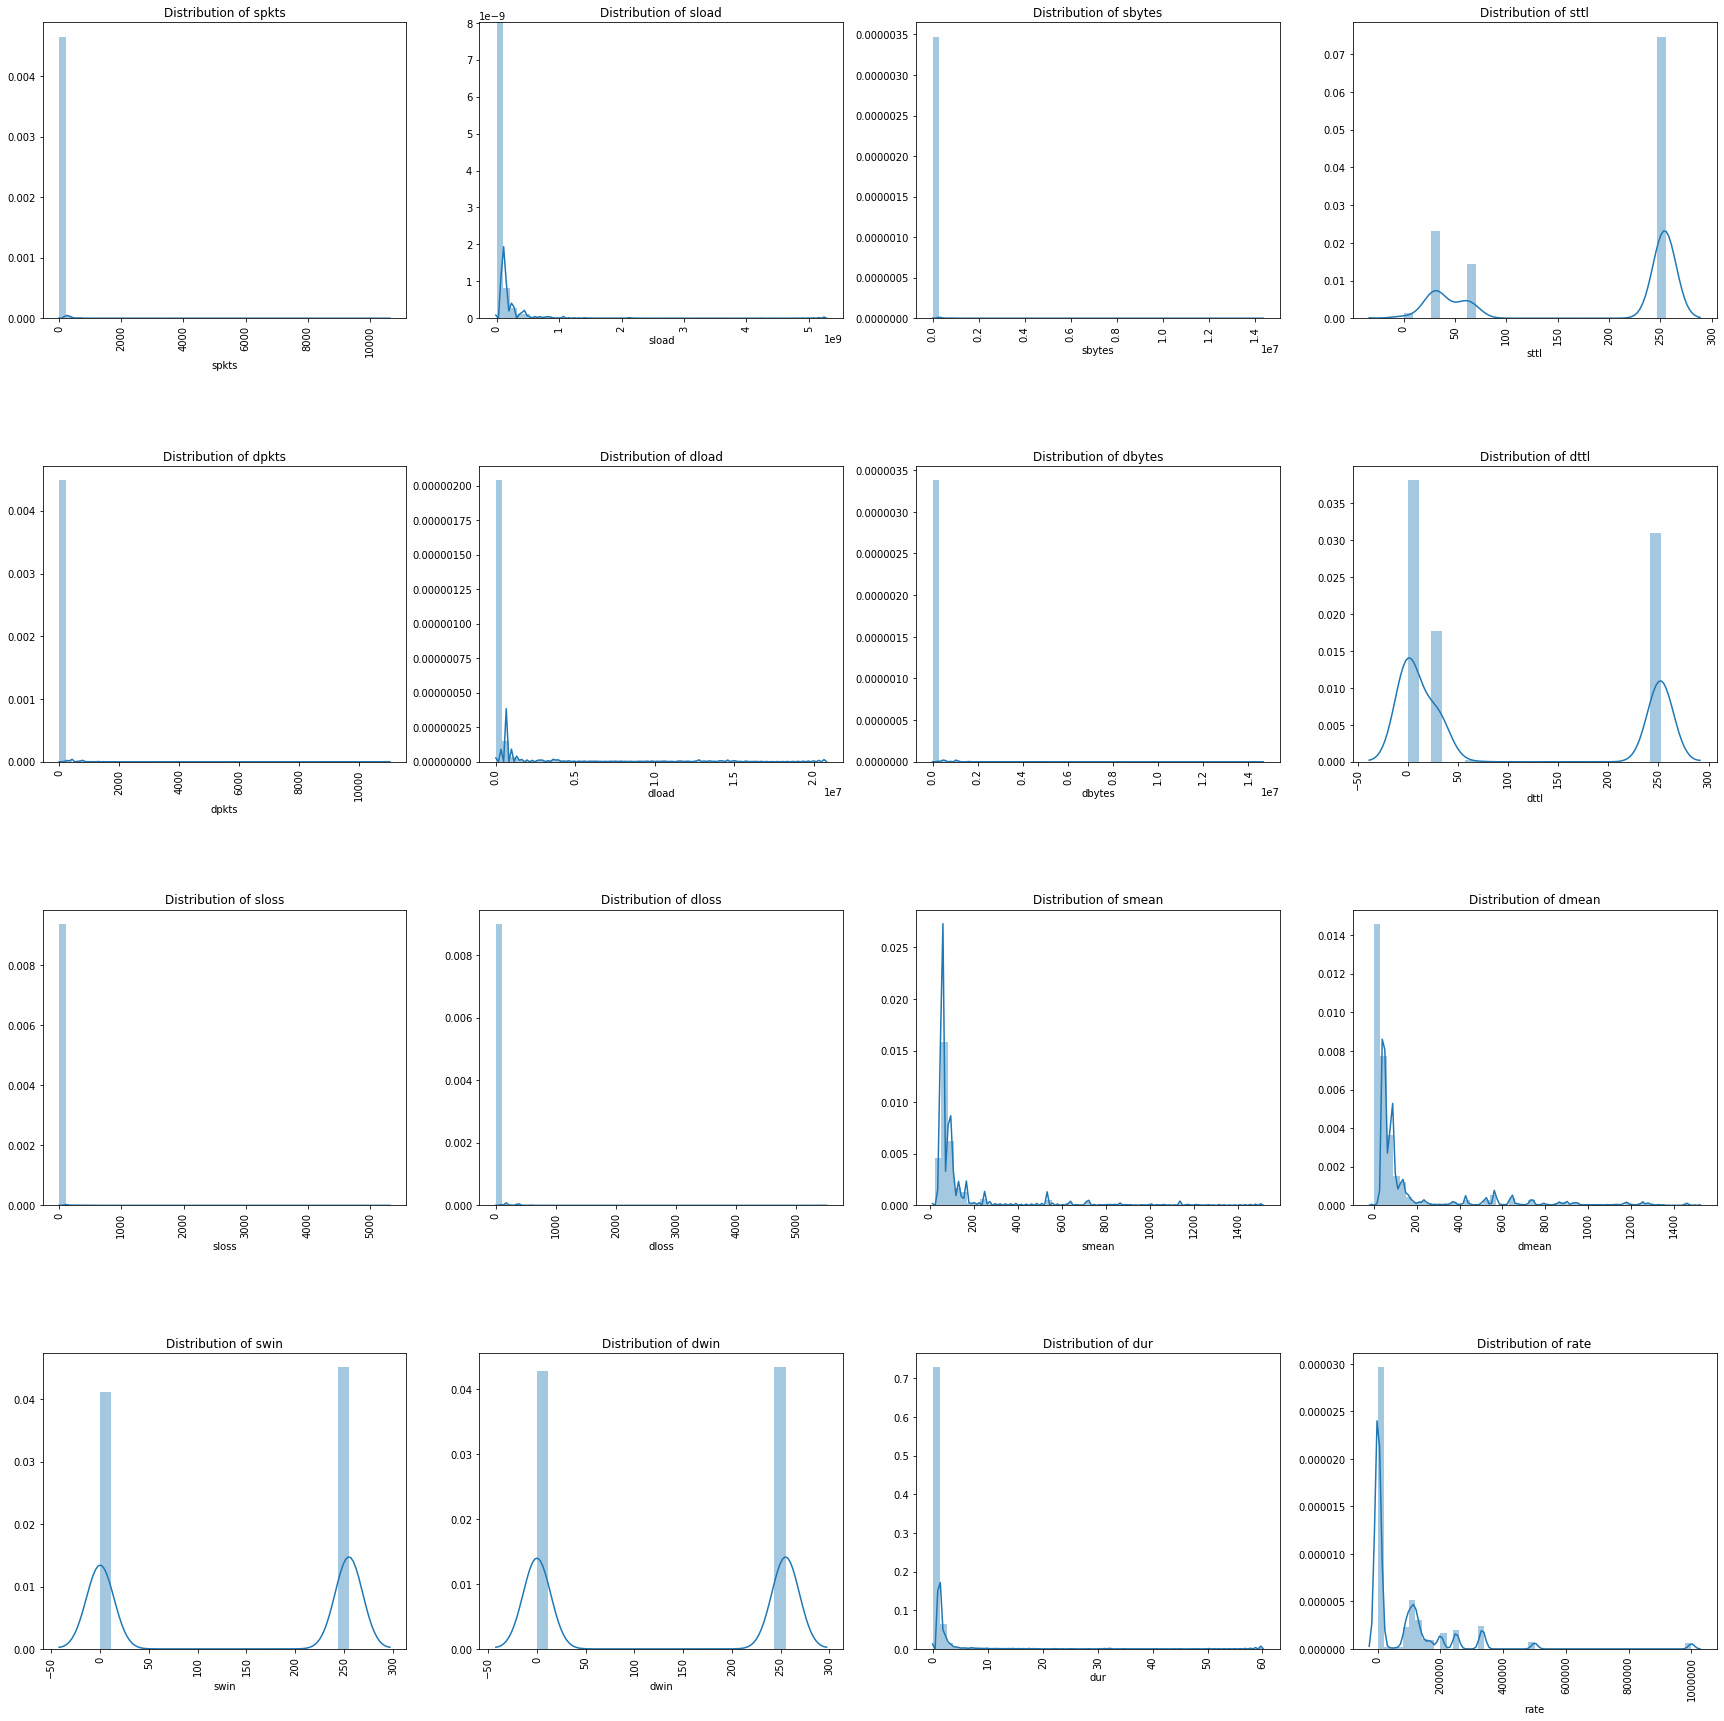

In [37]:
# Look at the distribution of some source and destination columns:
cols=['spkts','sload','sbytes','sttl','dpkts','dload','dbytes','dttl','sloss','dloss','smean','dmean','swin', 'dwin', 'dur','rate']

plt.figure(figsize=(30,50))
for i,col in enumerate(cols):
    plt.subplot(5,4,i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90, fontsize=10)
plt.subplots_adjust(hspace = 0.5, top = 0.7)
plt.show()

As you can see the distribution of source and destination almost the same, in sload,smean abit higher than dload,dmean and dttl higher than sttl. 

<Figure size 1800x720 with 0 Axes>

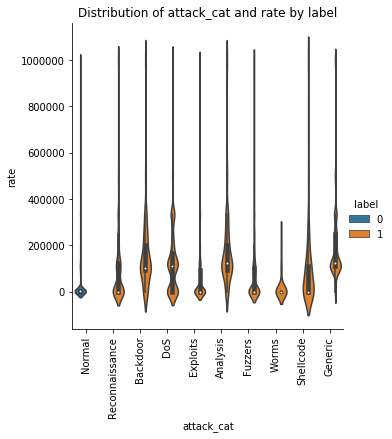

In [38]:
# Using violinplot to distribution of rate and attack_cat by label: 

plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y='rate', hue="label", kind="violin", split=False, data=df)
plt.title('Distribution of attack_cat and rate by label')
plt.xticks(rotation=90, fontsize=10)

plt.show()

As seen here, Average rae of Generic, Analysis and Backdoor are higher then others.

<Figure size 1800x720 with 0 Axes>

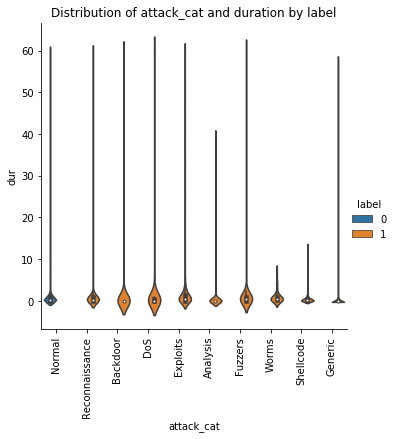

In [39]:
# Using violinplot to distribution of duration and attack_cat by label: 

plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y="dur", hue="label", kind="violin", split=False, data=df)
plt.title('Distribution of attack_cat and duration by label')
plt.xticks(rotation=90, fontsize=10)

plt.show()

Average duration of Fuzzers and Dos Attack are higher than others.

<Figure size 1800x720 with 0 Axes>

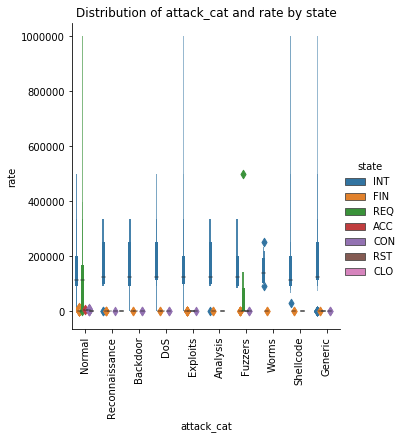

In [40]:
# Using boxen plot to distribution of rate and attack_cat by state:

plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y="rate", hue="state", kind="boxen", data=df)
plt.title('Distribution of attack_cat and rate by state')
plt.xticks(rotation=90, fontsize=10)

plt.show()

REQ transaction state has highest rate range in Normal.

<Figure size 1800x720 with 0 Axes>

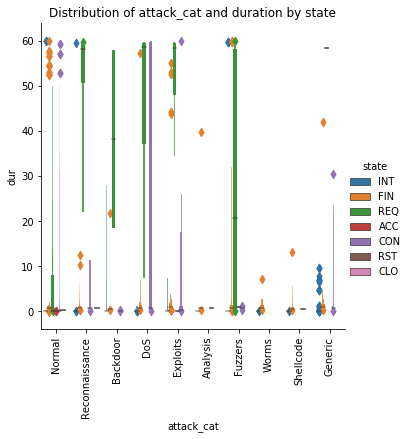

In [41]:
# Using boxen plot to distribution of duration and attack_cat by state:

plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y="dur", hue="state", kind="boxen", data=df)
plt.title('Distribution of attack_cat and duration by state')
plt.xticks(rotation=90, fontsize=10)

plt.show()

REQ transaction state has highest duration in Fuzzers Attack.

<Figure size 1800x720 with 0 Axes>

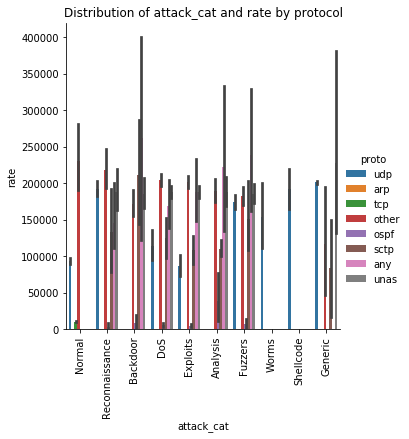

In [42]:
# Using barplot to distribution of rate and attack_cat by protocol:

plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y="rate", hue="proto", kind="bar", data=df)
plt.title('Distribution of attack_cat and rate by protocol')
plt.xticks(rotation=90, fontsize=10)

plt.show()

Udp protocol has highest range rate  in Generic Attack.

<Figure size 1800x720 with 0 Axes>

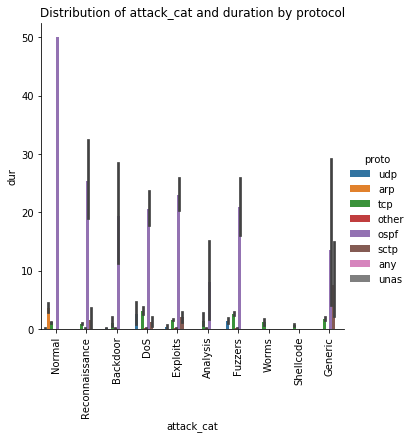

In [43]:
# Using barplot to distribution of duration and attack_cat by protocol:


plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y="dur", hue="proto", kind="bar", data=df)
plt.title('Distribution of attack_cat and duration by protocol')
plt.xticks(rotation=90, fontsize=10)

plt.show()

Highest duration is for Normal records in UDP protocol.

<Figure size 1800x720 with 0 Axes>

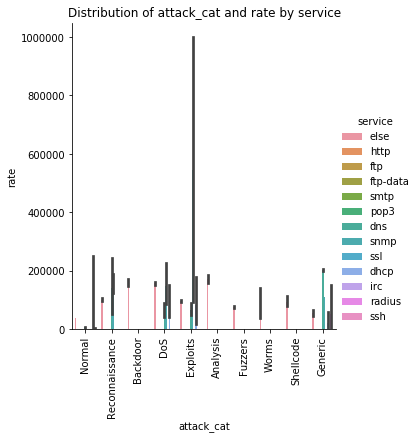

In [44]:
# Using barplot to distribution of rate and attack_cat by service:

plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y="rate", hue="service", kind="bar", data=df)
plt.title('Distribution of attack_cat and rate by service')
plt.xticks(rotation=90, fontsize=10)

plt.show()

Exploits Attack has highest range rate.

<Figure size 1800x720 with 0 Axes>

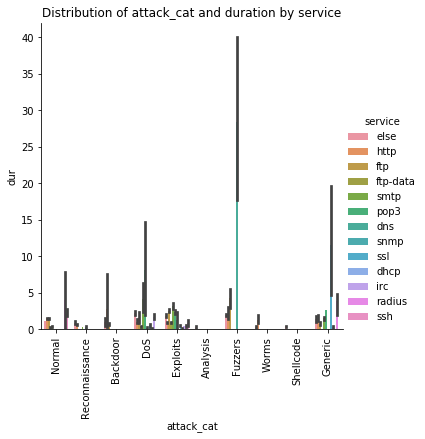

In [45]:
# Using barplot to distribution of duration and attack_cat by service:

plt.figure(figsize=(25,10))

sns.catplot(x="attack_cat", y="dur", hue="service", kind="bar", data=df)
plt.title('Distribution of attack_cat and duration by service')
plt.xticks(rotation=90, fontsize=10)

plt.show()

Fuzzers Attack has highest duration.

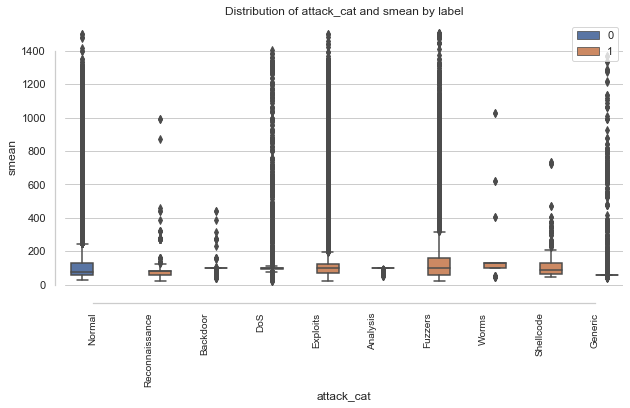

In [46]:
# Using boxplot to display range of average packets size transmittd by source in each category attack and label:

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

ax = sns.boxplot(x='attack_cat',y='smean',hue='label',data=df)  
plt.title('Distribution of attack_cat and smean by label')

sns.despine(offset=10, trim=True)
ax.set(xlabel='attack_cat', ylabel='smean')
plt.xticks(rotation=90, fontsize=10)
plt.legend(loc="upper right")

plt.show()

Exploits Attack is highest in smean.

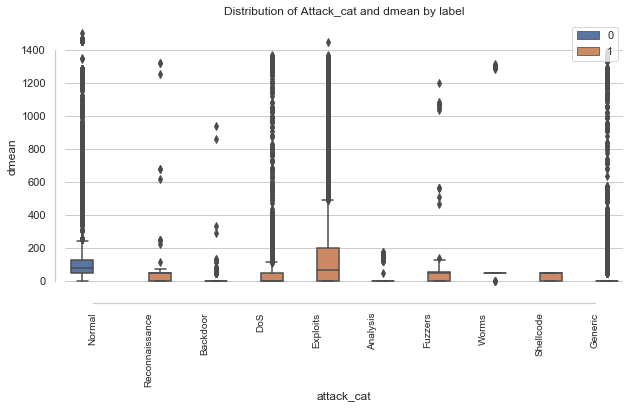

In [47]:
# Using boxplot to display range of average packets size transmittd by destination in each category attack and label:

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

ax = sns.boxplot(x='attack_cat',y='dmean',hue='label',data=df)  
plt.title('Distribution of Attack_cat and dmean by label')

sns.despine(offset=10, trim=True)
ax.set(xlabel='attack_cat', ylabel='dmean')
plt.xticks(rotation=90, fontsize=10)
plt.legend(loc="upper right")

plt.show()

Exploits Attack is highest in dmean.

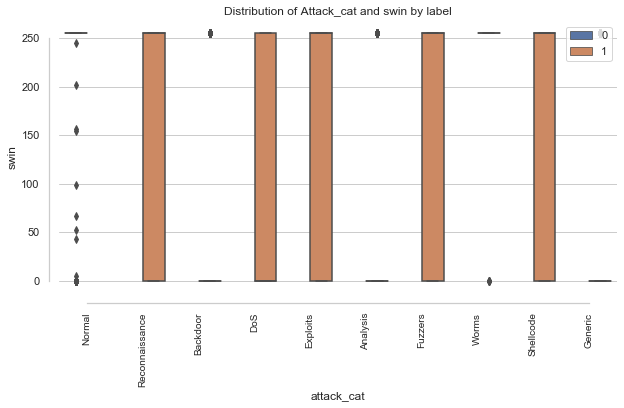

In [48]:
# Using boxplot to display Source TCP window advertisement value in each category attack and label:

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

ax = sns.boxplot(x='attack_cat',y='swin',hue='label',data=df)  
plt.title('Distribution of Attack_cat and swin by label')

sns.despine(offset=10, trim=True)
ax.set(xlabel='attack_cat', ylabel='swin')
plt.xticks(rotation=90, fontsize=10)
plt.legend(loc="upper right")

plt.show()

Reconnaissance Attack has highest range in swin.

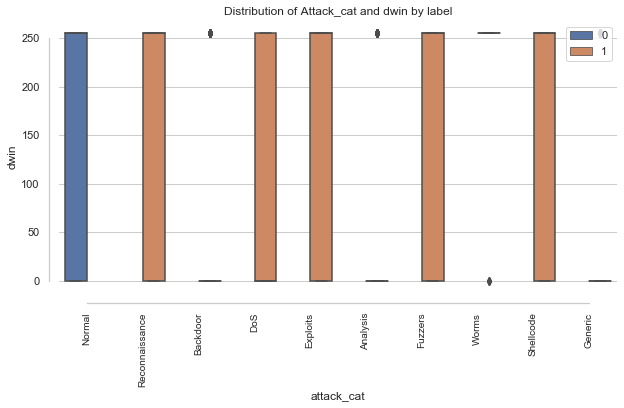

In [49]:
# Using boxplot to display destination TCP window advertisement value in each category attack and label:

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

ax = sns.boxplot(x='attack_cat',y='dwin',hue='label',data=df)  
plt.title('Distribution of Attack_cat and dwin by label')

sns.despine(offset=10, trim=True)
ax.set(xlabel='attack_cat', ylabel='dwin')
plt.xticks(rotation=90, fontsize=10)
plt.legend(loc="upper right")

plt.show()

Normal records and most type of Attack records have same range of dwin.

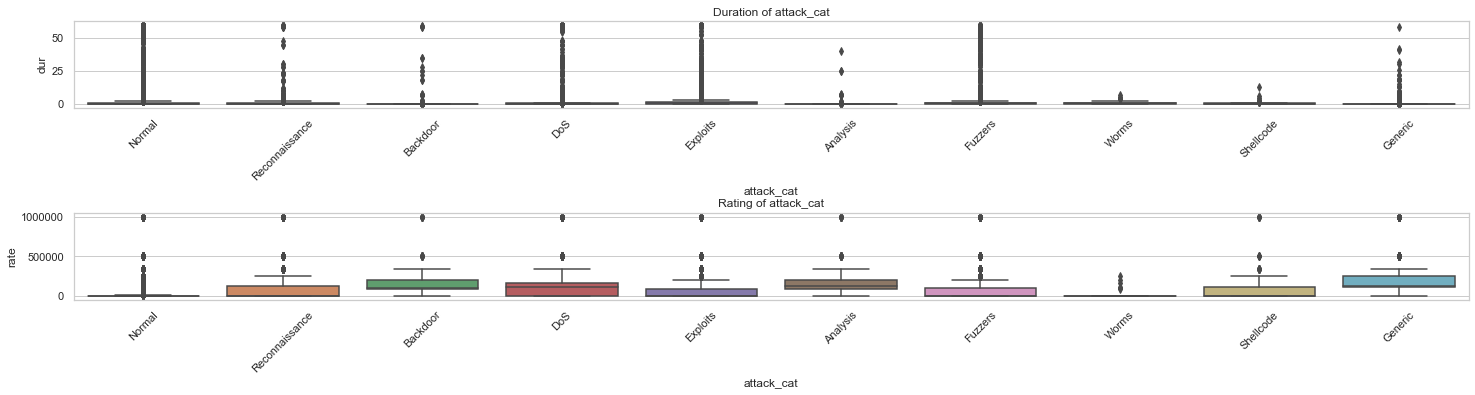

In [50]:
plt.figure(figsize=(25,5))

plt.subplot(2,1,1)
sns.boxplot(x='attack_cat', y='dur', data=df)
plt.title('Duration of attack_cat')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sns.boxplot(x='attack_cat', y='rate', data=df)
plt.title('Rating of attack_cat')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace = 1.2, top = 0.9)
plt.show()

- Duration of Exploits and Fuzzers are higher than other, also Normal records has the same duration.
- Average rate of Dos, Analysis and Generic Attack are higher than others.

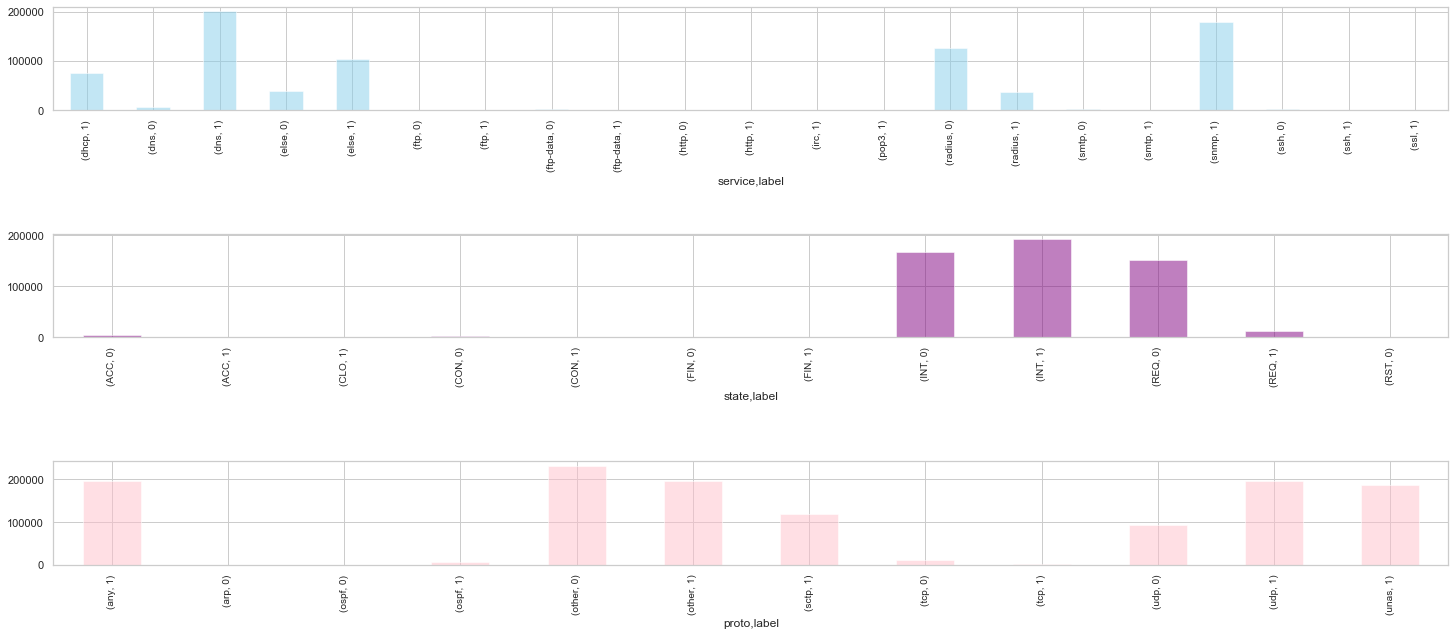

In [51]:
# Distribution of service , state, protocol with label by rate: 

plt.figure(figsize=(25,10))

plt.subplot(3,1,1)
df.groupby(['service', 'label']).rate.mean().plot(kind = 'bar', color = 'skyblue', label = 'service', linewidth=1, alpha = 0.5, grid = True)
plt.xticks(rotation=90, fontsize=10)


plt.subplot(3,1,2)
df.groupby(['state', 'label']).rate.mean().plot(kind = 'bar', color = 'purple', label = 'state', linewidth=1, alpha = 0.5, grid = True)
plt.xticks(rotation=90, fontsize=10)

plt.subplot(3,1,3)
df.groupby(['proto', 'label']).rate.mean().plot(kind = 'bar', color = 'pink', label = 'protocol', linewidth=1, alpha = 0.5, grid = True)
plt.xticks(rotation=90, fontsize=10)

plt.subplots_adjust(hspace = 1.2, top = 0.9)

plt.show()

- DNS service has highest average rate in Attack records.
- INt transaction State has highest average rate in Attack records. 
- UDP protocol has highest average rate in Attack records. 

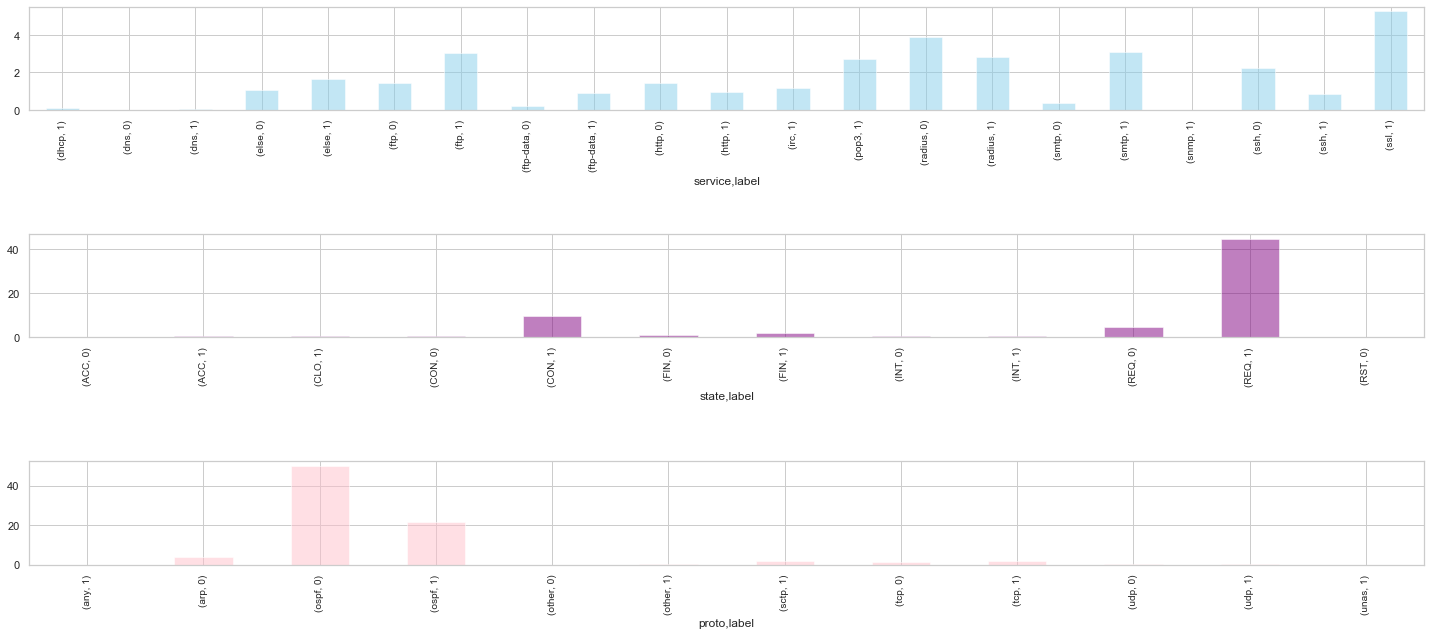

In [52]:
# Distribution of service , state, protocol with label by duration: 

plt.figure(figsize=(25,10))

plt.subplot(3,1,1)
df.groupby(['service', 'label']).dur.mean().plot(kind = 'bar', color = 'skyblue', label = 'service', linewidth=1, alpha = 0.5, grid = True)
plt.xticks(rotation=90, fontsize=10)

plt.subplot(3,1,2)
df.groupby(['state', 'label']).dur.mean().plot(kind = 'bar', color = 'purple', label = 'state', linewidth=1, alpha = 0.5, grid = True)
plt.xticks(rotation=90, fontsize=10)

plt.subplot(3,1,3)
df.groupby(['proto', 'label']).dur.mean().plot(kind = 'bar', color = 'pink', label = 'protocol', linewidth=1, alpha = 0.5, grid = True)
plt.xticks(rotation=90, fontsize=10)

plt.subplots_adjust(hspace = 1.2, top = 0.9)

plt.show()

- ssl service has highest average duration in Attack records.
- REQ transaction state has highest average duration in Attack records.
- OSPF protocol has highest average duration in Normal recoeds.

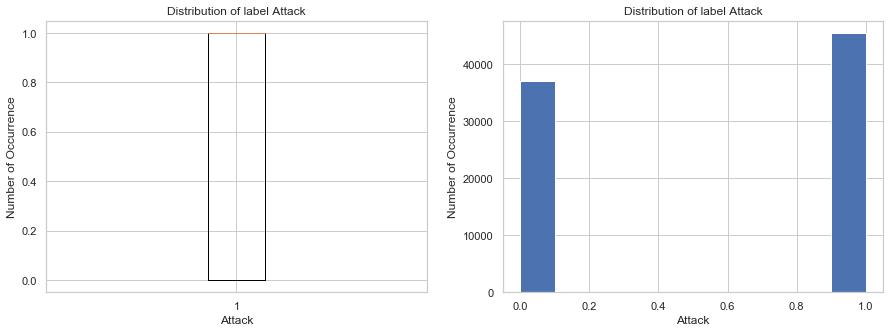

In [53]:
# Look at the distribution of target variable because target variable is binary use boxplot instead of hist plot:
plt.figure(figsize=(15,5))###???? im not sure choose label or attack_cat as a target??????
plt.subplot(1,2,1)
plt.boxplot(df['label'])
plt.title('Distribution of label Attack')
plt.xlabel("Attack")
plt.ylabel("Number of Occurrence")

plt.subplot(1,2,2)
plt.hist(df['label'])
plt.title('Distribution of label Attack')
plt.xlabel("Attack")
plt.ylabel("Number of Occurrence")
plt.show()

As seen here, distribution of label as a target variable (Attack vs. Normal records). 

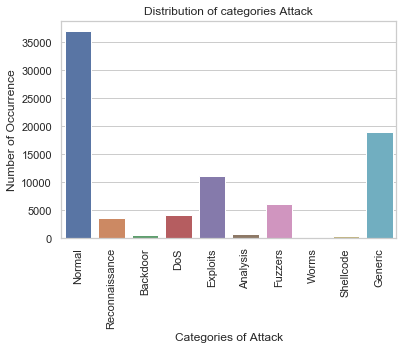

In [54]:
# Look at the distribution of target variable.#####???? can we choose both(label, attack_cat) as target variable??????

sns.countplot(df['attack_cat'])         ###? can use hist for object type???type of plot is correct??????
plt.title('Distribution of categories Attack')
plt.xlabel("Categories of Attack")
plt.ylabel("Number of Occurrence")
plt.xticks(rotation =90)
plt.show()

- Number of Normal records are higher than Attack records.
- Most common Attack is Generic.

In [55]:
# Using T_test to determine if there is a significant difference between the Normal and Attack records in rate:


normal_record=df[df.label== 0].groupby('attack_cat').rate.sum()
normal_record=np.array(normal_record)

attack_record= df[df.label==1].groupby('attack_cat').rate.sum()
attack_record=np.array(attack_record)

scipy.stats.ttest_ind(normal_record, attack_record, equal_var=False)

####?????for ttest choose correct column?????why get nan?????what does t test is parametric test means???

### ???? what does mannwhitneyu means and use for what?????/

Ttest_indResult(statistic=nan, pvalue=nan)

**Preparing data for modeling:** 

- For modeling,need all columns to be numeric. To convert nonnumeric to numeric values, I can either use dummy variables or encode them. By using dummy, we can make  

In [56]:
# Convert nonnumeric column to numeric by using dummies:
                     #####?????what is different between cat.codes and label encoding???????
categorical = df.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,proto_arp,proto_ospf,proto_other,proto_sctp,proto_tcp,proto_udp,proto_unas,service_dns,service_else,service_ftp,...,state_RST,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
# Drop nonnumeric columns variables after converting to dummies: 

df = df.drop(list(categorical.columns), axis=1)
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,2,1,3,0,0,0,2,3,0,0


In [58]:
# Concat dummies variables with dataset:

df = pd.concat([df, dummies], axis=1)
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_RST,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,0,0,0,0,0,0,1,0,0,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,0,0,0,0,0,0,1,0,0,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,0,0,0,0,0,0,1,0,0,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,0,0,0,0,0,0,1,0,0,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
# Findout label assigned to attack_cat:

#c = df_main['attack_cat'].astype('category')
#dic = dict(enumerate(c.cat.categories))
#df['code'] = df_main.attack_cat.astype('category').cat.codes
#df['attack_name'] = df['code'].map(dic)


#dummies_attack_cat=[col for col in df if col.startswith('attack_cat')]

In [60]:
# Use train_test_split to create the necessary training and test groups:

x = df.drop(['id','label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

**Applying Models:**

In [61]:
# Function Definition for model:

def get_scores(model, model_name):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_probs = model.predict_proba(X_train)
    test_probs = model.predict_proba(X_test)
    
    print('{} has training accuracy of: {}'.format(model_name, accuracy_score(y_train, train_preds)))
    print('{} has test accuracy of: {}\n'.format(model_name, accuracy_score(y_test, test_preds)))
    
    print('{} has training log loss of: {}'.format(model_name, log_loss(y_train, train_probs)))
    print('{} has test log loss of: {}\n'.format(model_name, log_loss(y_test, test_probs)))
    
    return train_preds, test_preds, train_probs, test_probs


**1- Preliminary Logistic Regression:**

In [62]:
# Applying logistic Regression model:

lr_initial = LogisticRegression(random_state=30, n_jobs=-1)

initial_lr_train_preds, initial_lr_test_preds, initial_lr_train_probs, initial_lr_test_probs = get_scores(lr_initial, ' Preliminary Logistic Regression model')


 Preliminary Logistic Regression model has training accuracy of: 0.755150687011311
 Preliminary Logistic Regression model has test accuracy of: 0.7575757575757576

 Preliminary Logistic Regression model has training log loss of: 0.530052175935274
 Preliminary Logistic Regression model has test log loss of: 0.5229950405477672



**2- Preliminary K Neighbors Classifier:**

In [63]:
# Applying KNeighbors Classifier model:????training loss is lower test is correct????


knn_initial = KNeighborsClassifier(n_jobs=-1)

initial_knn_train_preds, initial_knn_test_preds, initial_knn_train_probs, initial_knn_test_probs = get_scores(knn_initial, 'Preliminary knn model')

Preliminary knn model has training accuracy of: 0.8777195779245426
Preliminary knn model has test accuracy of: 0.8162992651970608

Preliminary knn model has training log loss of: 0.2301324171055656
Preliminary knn model has test log loss of: 0.8604699133780045



**3- Preliminary Random Forest Classifier:**

In [64]:
# Applying Random Forest Classifier model:????? 1 is correct??? what should i do??????

rfc_initial = RandomForestClassifier(random_state=30, n_jobs=-1)

initial_rfc_train_preds, initial_rfc_test_preds, initial_rfc_train_probs, initial_rfc_test_probs = get_scores(rfc_initial,'Preliminary Random Forest model')

Preliminary Random Forest model has training accuracy of: 1.0
Preliminary Random Forest model has test accuracy of: 1.0

Preliminary Random Forest model has training log loss of: 0.0009551389821633816
Preliminary Random Forest model has test log loss of: 0.0025543590942111835



**4- Preliminary Support Vector Classifier:**

In [65]:
# Applying Support Vector Classifier: why took long time ???????

#svc_initial = SVC(gamma='auto', probability=True)

#initial_svc_train_preds, initial_svc_test_preds, initial_svc_train_probs, initial_svc_test_probs = get_scores(svc_initial,'Preliminary Support Vector Classification model')

**5- Preliminary Gradiant Boosting Classifier:**

In [66]:
# Applying Gradoint Boosting Classifier:??????is it correct 1??????

gbc_initial = GradientBoostingClassifier(random_state=30)

initial_gbc_train_preds, initial_gbc_test_preds, initial_gbc_train_probs, initial_gbc_test_probs = get_scores(gbc_initial, 'Preliminary Gradient Boosting model')

Preliminary Gradient Boosting model has training accuracy of: 1.0
Preliminary Gradient Boosting model has test accuracy of: 1.0

Preliminary Gradient Boosting model has training log loss of: 0.0002919320935239173
Preliminary Gradient Boosting model has test log loss of: 0.00029166488444421244



In [67]:
# Create a dataFrame with accuracy of different models using dictionary:

preliminary_model_accuracy=pd.DataFrame({"Models":['Initial Logistic Regression', 'Initial knn', 'Initial Random Forest', 'Initial Gradient Boosting'], 
                 "Training Accuracy":[0.76,0.88,1,1],
                 "Test Accuracy":[0.76,0.82,1,1],
                 "Training Log Loss":[0.53,0.23,0,0],
                 "Test Log Loss":[0.52,0.86,0,0]}) 
 
preliminary_model_accuracy###>??? is there any way to get value instead of manually??????

,Models,Training Accuracy,Test Accuracy,Training Log Loss,Test Log Loss
0,Initial Logistic Regression,0.76,0.76,0.53,0.52
1,Initial knn,0.88,0.82,0.23,0.86
2,Initial Random Forest,1.00,1.00,0.00,0.00
3,Initial Gradient Boosting,1.00,1.00,0.00,0.00


As shown in above summary, training accuracies range (Number of correct predictions /Total number of predictions) from 63% to 94% and test accuracies range between 63% to 90%. The knn model has the most overfitting because the value of test accuracy is much lower than training accuracy compare with other models. These overfitting trends are similar in the log loss scoring(log loss:uncertainly). So, the best test accuracy and test log loss score goes to Gradient Boosting model. should be noted that these initial models are not optimized; I only use the default hyperparameters.

**Accuracy by Attack:**

In [68]:
# Find all columns start with 'attack_cat':
columns_attack = [col for col in df if col.startswith('attack_cat')]


In [69]:
# Findout models predict a certain type of attack particularly well or terribly:

def get_accuracies(predict, y_true):
    y_true = y_true.reset_index()###????? im not sure is it correct????
    accuracy_lst = []
    for col in df[columns_attack]: 
        count = 0
        for i in y_true[y_true==1].index:
            if predict[i] == 1:
                count += 1
        accuracy_lst.append(count/y_true[y_true==1].shape[0]*100)
    return accuracy_lst


In [70]:
# Findout the accuracy of each model for attack type:

lr_train_accuracies = get_accuracies(initial_lr_train_preds, y_train)
lr_test_accuracies = get_accuracies(initial_lr_test_preds, y_test)

knn_train_accuracies = get_accuracies(initial_knn_train_preds, y_train)
knn_test_accuracies = get_accuracies(initial_knn_test_preds, y_test) 

rfc_train_accuracies = get_accuracies(initial_rfc_train_preds, y_train)
rfc_test_accuracies = get_accuracies(initial_rfc_test_preds, y_test) 

#svc_train_accuracies = get_accuracies(initial_svc_train_preds, y_train)
#svc_test_accuracies = get_accuracies(initial_svc_test_preds, y_test)

gbc_train_accuracies = get_accuracies(initial_gbc_train_preds, y_train)
gbc_test_accuracies = get_accuracies(initial_gbc_test_preds, y_test)


Text(93.5, 0.5, 'Model')

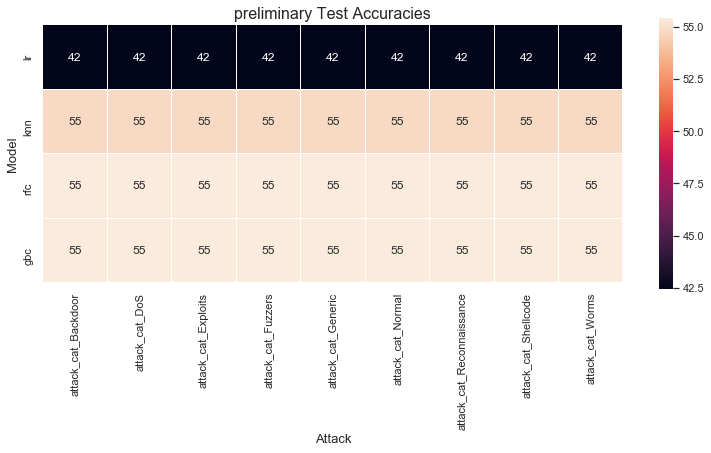

In [71]:
# Look at the test accuracies for each model and attack type by using heatmap:

models_accuracies = {'lr': lr_test_accuracies, 'knn': knn_test_accuracies, 'rfc': rfc_test_accuracies, 'gbc': gbc_test_accuracies}
df_test_accuracy = pd.DataFrame(models_accuracies, index = sorted(df[columns_attack]), columns = ['lr', 'knn', 'rfc', 'gbc'])

dig, ax = plt.subplots(figsize=(13, 5))

sns.heatmap(df_test_accuracy.T, square = True, linewidths=0.1, annot=True)
plt.title('preliminary Test Accuracies', fontsize = 16)
plt.xlabel('Attack', fontsize = 13)
plt.ylabel('Model', fontsize = 13)
                                    ####????? i want to find the best accuracy attack but each model have same value for all type attack???????

**- Improving Scores**

- Feature Engineering 

   - I've already done a bit of feature engineering by converting nonnumeric columns to numeric. 

   - Using PCA for dimentional reduction.
   
- Adding External Data Source

- Optimizing model by using Scale and Grid Search CV (find best parameters)

**- Applying PCA:**

In [72]:
# Applying PCA for feature reduction: 

X = df.drop(['label','id'], axis = 1)
Y = df['label']      

x = StandardScaler().fit_transform(X)
pca = PCA(0.90)
principalComponents = pca.fit_transform(x)

In [73]:
# Look at the pca components:
print(abs( pca.components_ )) 

[[0.0352496  0.03693075 0.04696839 ... 0.01341457 0.00347955 0.00489553]
 [0.00418189 0.07091737 0.12078435 ... 0.06487098 0.0248699  0.00538247]
 [0.12165232 0.27596852 0.40339827 ... 0.03593837 0.01115057 0.00148585]
 ...
 [0.02949656 0.01332089 0.03708959 ... 0.01719846 0.02536251 0.02225273]
 [0.00280358 0.00556453 0.17508587 ... 0.09339885 0.01930453 0.0235003 ]
 [0.00997684 0.01237685 0.00077287 ... 0.36784351 0.15203148 0.01014684]]


In [74]:
# Findout number of components explained 90% of variance in the dataset:
pca_number = pca.n_components_
print(pca_number)

34


In [75]:
# print the percentage of total variance in the dataset explained by each components:
print(
    'The percentage of total variance in the dataset explained by each, component from Sklearn PCA.\n',
    pca.explained_variance_ratio_ ,pca.explained_variance_ratio_.sum() 
)

The percentage of total variance in the dataset explained by each, component from Sklearn PCA.
 [0.1867353  0.06237496 0.0519717  0.04424792 0.04016511 0.03670371
 0.03526214 0.03145101 0.02996456 0.02894104 0.02428105 0.02048384
 0.01991146 0.01926615 0.01689162 0.01504968 0.01461841 0.01444599
 0.01421325 0.01403989 0.01383654 0.01378757 0.01372922 0.01371481
 0.01370104 0.01369277 0.01369116 0.01366977 0.01349943 0.01327169
 0.01247701 0.01204279 0.01071682 0.01027448] 0.9031239081631827


In [76]:
# Convert PCA to dataframe:

principalDf = pd.DataFrame(data = principalComponents, columns = ['pca' + str(i) for i in range (1, pca_number+1)])
principalDf.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34
0,-1.301632,-2.759466,0.393507,0.149705,-0.614239,-0.298551,-0.353046,-0.353602,0.823381,0.332680,...,0.006885,0.028185,-0.022775,0.018198,0.069546,-0.226988,-0.080570,-0.205273,-0.111939,-0.836858
1,-1.538460,-3.313511,0.425930,1.137811,-0.835249,-0.485322,-0.543784,-0.296954,0.504835,0.222093,...,-0.028482,0.248027,0.079285,0.134078,0.646137,-0.491751,-0.453425,-0.771704,0.083457,-0.851489
2,-1.747644,-3.235310,0.412864,0.855650,-0.931460,-0.315298,-0.390422,-0.339447,0.508096,0.272802,...,-0.027890,0.246369,0.082676,0.105976,0.593208,-0.538793,-0.318480,-0.576507,0.032045,-0.898686
3,-1.673109,-2.951758,0.391890,0.606283,-0.776932,-0.300228,-0.387080,-0.374601,0.570827,0.277973,...,-0.015162,0.165864,0.048803,0.075359,0.409934,-0.414624,-0.276196,-0.445938,-0.013391,-0.861701
4,-1.577067,-3.153700,0.407129,1.257660,-0.717790,-0.542645,-0.632019,-0.335874,0.428782,0.175277,...,-0.027107,0.237782,0.077059,0.145689,0.658779,-0.442058,-0.562285,-0.854380,0.108435,-0.810692


In [77]:
# Add target variable:

principalDf['label'] = df['label']
principalDf.dropna(inplace=True)


In [78]:
# Split the PCA dataset:???? for pca dataset need to spilit???????

x = principalDf.drop(['label'], 1)
y = principalDf['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

**Applying model after PCA:**

   **1.1 Logistic Regression:**

In [79]:
# Applying logistic Regression model After applying PCA:

lr_pca = LogisticRegression( n_jobs=-1)

lr_pca_train_preds, lr_pca_test_preds, lr_pca_train_probs, lr_pca_test_probs = get_scores(lr_pca, ' Logistic Regression Model')


 Logistic Regression Model has training accuracy of: 0.9999544522887724
 Logistic Regression Model has test accuracy of: 0.999817817453088

 Logistic Regression Model has training log loss of: 0.0006479963653957794
 Logistic Regression Model has test log loss of: 0.0014184947860668927



**2.1 K Neighbors Classifier:**

In [80]:
# Applying KNeighbors Classifier model:


knn_pca = KNeighborsClassifier(n_jobs=-1)

knn_pca_train_preds, knn_pca_test_preds, knn_pca_train_probs, knn_pca_test_probs = get_scores(knn_pca, 'KNN Model')

KNN Model has training accuracy of: 0.9994078797540423
KNN Model has test accuracy of: 0.99908908726544

KNN Model has training log loss of: 0.0009705232969188695
KNN Model has test log loss of: 0.005524937559584795



**3.1 Random Forest Classifier:**

In [81]:
# Applying Random Forest Classifier model:

rfc_pca = RandomForestClassifier(n_jobs=-1)

rfc_pca_train_preds, rfc_pca_test_preds, rfc_pca_train_probs, rfc_pca_test_probs = get_scores(rfc_pca,'Random Forest Model')

Random Forest Model has training accuracy of: 0.9999848174295908
Random Forest Model has test accuracy of: 0.9997570899374506

Random Forest Model has training log loss of: 0.000852408365670573
Random Forest Model has test log loss of: 0.0025910690523055536



**4.1 Support Vector Classifier:**

In [82]:
# Applying Support Vector Classifier: why took long time ???????

#svc_initial = SVC(gamma='auto', probability=True)

#initial_svc_train_preds, initial_svc_test_preds, initial_svc_train_probs, initial_svc_test_probs = get_scores(svc_initial,'Preliminary Support Vector Classification model')

**5.1 Preliminary Gradiant Boosting Classifier:**

In [83]:
# Applying Gradoant Boosting Classifier:

gbc_pca = GradientBoostingClassifier()

gbc_pca_train_preds, gbc_pca_test_preds, gbc_pca_train_probs, gbc_pca_test_probs = get_scores(gbc_pca, 'Gradient Boosting Model')

Gradient Boosting Model has training accuracy of: 0.9990434980642223
Gradient Boosting Model has test accuracy of: 0.9983603570777919

Gradient Boosting Model has training log loss of: 0.007423230965535529
Gradient Boosting Model has test log loss of: 0.0086163149172486



In [84]:
# Create a dataFrame with accuracy of different models using dictionary:

applying_pca_model_accuracy=pd.DataFrame({"Models":['Logistic Regression', 'knn', 'Random Forest', 'Gradient Boosting'], 
                 "Training Accuracy PCA":[1,1,1,1],
                 "Test Accuracy PCA":[1,1,1, 1],
                 "Training Log Loss PCA":[0,0,0,0],
                 "Test Log Loss PCA":[0,1,0,0]}) 
 
applying_pca_model_accuracy

####????? why all 0 and 1???
############################?????? i have to continue with pca or not?

,Models,Training Accuracy PCA,Test Accuracy PCA,Training Log Loss PCA,Test Log Loss PCA
0,Logistic Regression,1,1,0,0
1,knn,1,1,0,1
2,Random Forest,1,1,0,0
3,Gradient Boosting,1,1,0,0


As shown in above summary, training accuracies after applying PCA is in range (Number of correct predictions /Total number of predictions) from 86% to 94% and test accuracies range between 66% to 87%. The Random Forest model has the most overfitting because the value of test accuracy is much lower than training accuracy compare with other models. These overfitting trends are similar in the log loss scoring(log loss:uncertainly). So, the best test accuracy and test log loss score goes to Gradient Boosting model. should be noted that these initial models are not optimized; I only use the default hyperparameters.

**- Adding External Sources:**

Adding new dataset to improve accuracy of model.this dataset consists of a wide variety of intrusions simulated in a network environment. It created an environment to acquire raw TCP/IP dump data for a network. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. 
 

In [85]:
# Load new dataset:
df_new = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\capstonbotdataset\Train_data.csv')


In [86]:
# Look at the new dataset:
df_new.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [87]:
# Rename the Attack column to label:
df_new = df_new.rename(columns={"class" : "label", "protocol_type" : "proto", "duration" : "dur"})

In [88]:
# mapping values to number:
df_new['label']= df_new['label'].replace('normal',0).replace('anomaly',1)

In [89]:
# Remove some protocol values in new dataset and look at the value counts:
#df_new = df_new[(df_new.proto!='icmp') & (df_new.proto!='ipv6-icmp')]


In [90]:
# Choosing some columns from main dataset:
df1 = df_main[['dur','proto','service','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss','dloss','smean','dmean','attack_cat','label']]


In [91]:
# Choosing some columns from new dataset:
df_new = df_new[['proto','service','dur','src_bytes', 'dst_bytes']]###??? i have target variable in new dataset too what should i do i remove from new data???

In [92]:
# Select 0.01 percent of new dataset:
df2 = df_new.sample(frac =0.01) 

In [93]:
# Look at the shape of new dataset:
df2.shape

(252, 5)

In [94]:
# Merge two dataset:
df3 = pd.merge(left=df1, right=df2, on=['proto', 'service'])##correct??????/???????????

In [95]:
# Look at the dataset:
df3.head()

,dur_x,proto,service,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,smean,dmean,attack_cat,label,dur_y,src_bytes,dst_bytes
0,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,Normal,0,0,207,1524
1,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,Normal,0,0,299,1046
2,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,Normal,0,0,291,928
3,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,Normal,0,0,233,1783
4,0.983874,tcp,http,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,82,147,Normal,0,0,304,1380


In [96]:
# Look at the shape of final dataset:
df3.shape

(666832, 19)

In [97]:
# Findout percentage of missing values in each columns:

null_count = round(df3.isnull().sum()*100/df3.isnull().count(),2)
null_count[null_count>0]

Series([], dtype: float64)

In [98]:
# Findout object columns:

object_columns = df3.select_dtypes('object')
object_columns.head()

,proto,service,attack_cat
0,tcp,http,Normal
1,tcp,http,Normal
2,tcp,http,Normal
3,tcp,http,Normal
4,tcp,http,Normal


**Preparing data for modeling:**

In [99]:
# Convert nonnumeric columns to numeric by using dummies:
                     #####?????what is different between cat.codes and label encoding???????

categorical = df3.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,service_smtp,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Worms
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [100]:
# Drop nonnumeric columns variables after converting to dummies: 
df = df3.drop(list(categorical.columns), axis=1)

In [101]:
# Concat dummies variables with dataset:

df = pd.concat([df, dummies], axis=1)
df.head()

,dur_x,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,...,src_bytes,dst_bytes,service_smtp,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Worms
0,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,...,207,1524,0,0,0,0,0,1,0,0
1,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,...,299,1046,0,0,0,0,0,1,0,0
2,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,...,291,928,0,0,0,0,0,1,0,0
3,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,...,233,1783,0,0,0,0,0,1,0,0
4,0.983874,816,1172,17.278635,62,252,5976.375,8342.53125,2,2,...,304,1380,0,0,0,0,0,1,0,0


In [102]:
# Use train_test_split to create the necessary training and test groups:

x = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

**Applying Models to new dataset:**

In [103]:
# Definition function for model:

def get_scores(model, model_name):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_probs = model.predict_proba(X_train)
    test_probs = model.predict_proba(X_test)
    
    print('{} has training accuracy of: {}'.format(model_name, accuracy_score(y_train, train_preds)))
    print('{} has test accuracy of: {}\n'.format(model_name, accuracy_score(y_test, test_preds)))
    
    print('{} has training log loss of: {}'.format(model_name, log_loss(y_train, train_probs)))
    print('{} has test log loss of: {}\n'.format(model_name, log_loss(y_test, test_probs)))
    
    return train_preds, test_preds, train_probs, test_probs


**1.2 Logistic Regression:**

In [104]:
# Applying logistic Regression model:

lr = LogisticRegression( n_jobs=-1)

lr_train_preds, lr_test_preds, lr_train_probs, lr_test_probs = get_scores(lr, ' Logistic Regression Model')


 Logistic Regression Model has training accuracy of: 0.6955564095114019
 Logistic Regression Model has test accuracy of: 0.6924801487624375

 Logistic Regression Model has training log loss of: 0.5344334494894883
 Logistic Regression Model has test log loss of: 0.5370304714718548



**2.2 K Neighbors Classifier:**

In [105]:
# Applying KNeighbors Classifier model:


knn = KNeighborsClassifier(n_jobs=-1)

knn_train_preds, knn_test_preds, knn_train_probs, knn_test_probs = get_scores(knn, 'KNN Model')

KNN Model has training accuracy of: 0.9860703138912581
KNN Model has test accuracy of: 0.9786603882519663

KNN Model has training log loss of: 0.03158888446363403
KNN Model has test log loss of: 0.18192708064858726



**3.2 Random Forest Classifier:**

In [106]:
# Applying Random Forest Classifier model:###??? the result is ok?????

rfc = RandomForestClassifier(n_jobs=-1)

rfc_train_preds, rfc_test_preds, rfc_train_probs, rfc_test_probs = get_scores(rfc,'Random Forest Model')

Random Forest Model has training accuracy of: 1.0
Random Forest Model has test accuracy of: 1.0

Random Forest Model has training log loss of: 1.382515460504092e-06
Random Forest Model has test log loss of: 7.110039522923121e-06



**4.2 Support Vector Classifier:**

In [107]:
# Applying Support Vector Classifier: why took long time ???????

#svc_initial = SVC(gamma='auto', probability=True)

#initial_svc_train_preds, initial_svc_test_preds, initial_svc_train_probs, initial_svc_test_probs = get_scores(svc_initial,'Preliminary Support Vector Classification model')

**5.2 Gradiant Boosting Classifier:**

In [108]:
# Applying Gradiant Boosting Classifier:???? result?????

gbc = GradientBoostingClassifier()

gbc_train_preds, gbc_test_preds, gbc_train_probs, gbc_test_probs = get_scores(gbc, 'Gradient Boosting Model')

Gradient Boosting Model has training accuracy of: 1.0
Gradient Boosting Model has test accuracy of: 1.0

Gradient Boosting Model has training log loss of: 0.0002942445078731352
Gradient Boosting Model has test log loss of: 0.00029426230822907095



In [109]:
# Create a dataFrame with accuracy of different models using dictionary:

model_newdata_accuracy=pd.DataFrame({"Models":['Logistic Regression', 'knn', 'Random Forest', 'Gradient Boosting'], 
                 "Training Accuracy":[0.66,0.99,1,1],
                 "Test Accuracy":[0.67,0.98,1, 1],
                 "Training Log Loss":[0.54,0.03,1.99,0],
                 "Test Log Loss":[0.54,0.18,7.99,0]}) 
 
model_newdata_accuracy###>??? is there any way to get value instead of manually??????

,Models,Training Accuracy,Test Accuracy,Training Log Loss,Test Log Loss
0,Logistic Regression,0.66,0.67,0.54,0.54
1,knn,0.99,0.98,0.03,0.18
2,Random Forest,1.00,1.00,1.99,7.99
3,Gradient Boosting,1.00,1.00,0.00,0.00


**Optimizing Models by Hyperparameter Optimization**

In [110]:
#????? for optimizing need to standardized data by scale or not??????? also need scale target???

- Scaling data before applying model can sometimes help model performance. 

- For the most part, by using RandomizedSearchCV, We can optimize hyperparameters to find a starting set of hyperparameters. but, I use GridSearchCV to find the best hyperparameters.


**1.3 Logistic Regression Optimization:**

- Scaling data then applying model:


In [111]:
# Scaled features:

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
# Applying Unscaled data in the model:

lr_unscaled = LogisticRegression(n_jobs = -1)

unscaled_lr_train_preds, unscaled_lr_test_preds, unscaled_lr_train_probs, unscaled_lr_test_probs = get_scores(lr_unscaled, 'Unscaled Logistic Regression')

Unscaled Logistic Regression has training accuracy of: 0.6955564095114019
Unscaled Logistic Regression has test accuracy of: 0.6924801487624375

Unscaled Logistic Regression has training log loss of: 0.5344334494894883
Unscaled Logistic Regression has test log loss of: 0.5370304714718548



In [113]:
# Applying Scaled data in the model:

lr_scaled = LogisticRegression(n_jobs = -1)

lr_scaled.fit(X_train_scaled, y_train)

scaled_lr_train_preds = lr_scaled.predict(X_train_scaled)
scaled_lr_test_preds = lr_scaled.predict(X_test_scaled)
scaled_lr_train_probs = lr_scaled.predict_proba(X_train_scaled)
scaled_lr_test_probs = lr_scaled.predict_proba(X_test_scaled)

print('{} has training accuracy of: {}'.format('Scaled logistic regression', accuracy_score(y_train, scaled_lr_train_preds)))
print('{} has test accuracy of: {}\n'.format('Scaled logistic regression', accuracy_score(y_test, scaled_lr_test_preds)))

print('{} has training log loss of: {}'.format('Scaled logistic regression', log_loss(y_train, scaled_lr_train_probs)))
print('{} has test log loss of: {}\n'.format('Scaled logistic regression', log_loss(y_test, scaled_lr_test_probs)))

Scaled logistic regression has training accuracy of: 1.0
Scaled logistic regression has test accuracy of: 1.0

Scaled logistic regression has training log loss of: 6.42884530513973e-05
Scaled logistic regression has test log loss of: 6.506265534754792e-05



In this case, scaling does not seem to improve the model.

**- Using GridSearchCV:**

In [114]:
# GridSearch Parameter describtion:??? i dont know how to give parameters value?????

lr_grid_params = {
    'penalty': ['l2'],
    'C': np.arange(0.1, 1.1, 0.2),
    'class_weight': ['balanced', None],
    'solver': ['sag', 'saga'], 
    'multi_class': ['auto']
}

In [ ]:
# Applying GridSearch:

lr = LogisticRegression()
lr_gridsearch = GridSearchCV(estimator = lr, param_grid = lr_grid_params, cv = 3)
lr_gridsearch.fit(X_train, y_train)

In [ ]:
#score = cross_val_score(lr_gridsearch, X_train, y_train, cv=10)  is this need????
#print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

In [ ]:
# View the accuracy score
#print('Best score for model:', lr_gridsearch.best_score_) 

In [ ]:
# Finding best parameters:
lr_gridsearch.best_params_

In [ ]:
# Use train_test_split to create the necessary training and test groups:

x = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [ ]:
# Applying Logistic Regression with best parameters:

lr_final = LogisticRegression(penalty='l2', C = 0.1, 
                              class_weight = None, solver = 'sag', multi_class = 'auto')
lr_final.fit(X_train, y_train)
    
lr_final_train_preds = lr_final.predict(X_train)
lr_final_test_preds = lr_final.predict(X_test)

lr_final_train_probs = lr_final.predict_proba(X_train)
lr_final_test_probs = lr_final.predict_proba(X_test)

print('{} has training accuracy of: {}'.format('Final logistic regression', accuracy_score(y_train, lr_final_train_preds)))
print('{} has test accuracy of: {}\n'.format('Final logistic regression', accuracy_score(y_test, lr_final_test_preds)))

print('{} has training log loss of: {}'.format('Final logistic regression', log_loss(y_train, lr_final_train_probs)))
print('{} has test log loss of: {}\n'.format('Final logistic regression', log_loss(y_test, lr_final_test_probs)))

**2.3 K Neighbors Optimization:**

- Scaling data then applying model:

In [ ]:
# Scaled features:

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Applying Unscaled data in the model:

knn_unscaled = KNeighborsClassifier(n_jobs=-1)

unscaled_knn_train_preds, unscaled_knn_test_preds, unscaled_knn_train_probs, unscaled_knn_test_probs = get_scores(knn_unscaled, 'Unscaled KNN')

In [ ]:
# Applying Scaled data in the model:

knn_scaled = KNeighborsClassifier(n_jobs=-1)

knn_scaled.fit(X_train_scaled, y_train)

scaled_knn_train_preds = knn_scaled.predict(X_train_scaled)
scaled_knn_test_preds = knn_scaled.predict(X_test_scaled)
scaled_knn_train_probs = knn_scaled.predict_proba(X_train_scaled)
scaled_knn_test_probs = knn_scaled.predict_proba(X_test_scaled)

print('{} has training accuracy of: {}'.format('Scaled KNN', accuracy_score(y_train, scaled_knn_train_preds)))
print('{} has test accuracy of: {}\n'.format('Scaled KNN', accuracy_score(y_test, scaled_knn_test_preds)))

print('{} has training log loss of: {}'.format('Scaled KNN', log_loss(y_train, scaled_knn_train_probs)))
print('{} has test log loss of: {}\n'.format('Scaled KNN', log_loss(y_test, scaled_knn_test_probs)))

- Using GridSearchCV:

There are two main parameters to check for KNN classification: number of neighbors (k)and weighted vs non weighted distances. 

In [ ]:
# GridSearch Parameter describtion:

k_range = list(range(1,12))
weight_options = ["uniform", "distance"]

knn_grid_params = dict(n_neighbors = k_range, weights = weight_options)

In [ ]:
# Applying GridSearch:

knn = KNeighborsClassifier()

knn_gridsearch = GridSearchCV(estimator = knn, param_grid = knn_grid_params, cv = 3)
knn_gridsearch.fit(X_train, y_train)

In [ ]:
#score = cross_val_score(knn_gridsearch, X_train, y_train, cv=10)  
#print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

In [ ]:
# View the accuracy score
#print('Best score for model:', knn_gridsearch.best_score_) 

In [ ]:
# Finding best parameters:
knn_gridsearch.best_params_

In [ ]:
# Applying K Neighbors Classifier with best parameters:

knn_final = KNeighborsClassifier(n_neighbors=4, n_jobs=-1, weights='distance')
knn_final.fit(X_train, y_train)
    
knn_final_train_preds = knn_final.predict(X_train)
knn_final_test_preds = knn_final.predict(X_test)

knn_final_train_probs = knn_final.predict_proba(X_train)
knn_final_test_probs = knn_final.predict_proba(X_test)

print('{} has training accuracy of: {}'.format('Final KNN Classifier', accuracy_score(y_train, lr_final_train_preds)))
print('{} has test accuracy of: {}\n'.format('Final KNN Classifier', accuracy_score(y_test, lr_final_test_preds)))

print('{} has training log loss of: {}'.format('Final KNN Classifier', log_loss(y_train, lr_final_train_probs)))
print('{} has test log loss of: {}\n'.format('Final KNN Classifier', log_loss(y_test, lr_final_test_probs)))

**3.3 Random Forest Optimization:**

- Scaling data:

scaling is not necessary for Random Forest. Random Forest is a tree-based model and hence does not require feature scaling.

- Using GridSearchCV:

In [ ]:
# GridSearch Parameter describtion:
rfc_grid_params = {
    'n_estimators': [200, 300],
    'max_features': ['auto'],
    'max_depth' : [2,3,5,7],
    'criterion' :['gini', 'entropy']
}

In [ ]:
# Applying GridSearch:

rfc = RandomForestClassifier()

rfc_gridsearch = GridSearchCV(estimator=rfc, param_grid=rfc_grid_params, cv = 3)
rfc_gridsearch.fit(X_train, y_train)

In [ ]:
#score = cross_val_score(rfc_gridsearch, X_train, y_train, cv=10)  
#print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

In [ ]:
# View the accuracy score
#print('Best score for model:', rfc_gridsearch.best_score_) 

In [ ]:
# Finding best parameters:
rfc_gridsearch.best_params_

In [ ]:
# Applying Random Forest Classifier with best parameters:

rfc_final = RandomForestClassifier(n_estimators = 200, max_depth = 3, max_features = 'auto', criterion ='gini')
rfc_final.fit(X_train, y_train)
    
rfc_final_train_preds = rfc_final.predict(X_train)
rfc_final_test_preds = rfc_final.predict(X_test)

rfc_final_train_probs = rfc_final.predict_proba(X_train)
rfc_final_test_probs = rfc_final.predict_proba(X_test)

print('{} has training accuracy of: {}'.format('Final Random Forest', accuracy_score(y_train, rfc_final_train_preds)))
print('{} has test accuracy of: {}\n'.format('Final Random Forest', accuracy_score(y_test, rfc_final_test_preds)))

print('{} has training log loss of: {}'.format('Final Random Forest', log_loss(y_train, rfc_final_train_probs)))
print('{} has test log loss of: {}\n'.format('Final Random Forest', log_loss(y_test, rfc_final_test_probs)))

**4.3 Gradient Boosting Optimization:**

- Scaling data:

scaling is not necessary for Gradiant Boosting. RGradiant Boosting is a tree-based model so does not require feature scaling.

- Using GridSearchCV:

In [ ]:
# GridSearch Parameter describtion:

gbc_grid_params = {
    "loss":["deviance"],
    "min_samples_split": [4,8,12],
    "min_samples_leaf": [3,5,7],
    "max_depth":[3,5,7],
    "max_features":[3,5,7],
    "subsample":[0.5, 1.0],
    "n_estimators":[100,1000]
}   

In [ ]:
# Applying GridSearch:

gbc = GradientBoostingClassifier()

gbc_gridsearch = GridSearchCV(gbc, param_grid = gbc_grid_params,cv=3)
gbc_gridsearch.fit(X_train, y_train)

In [ ]:
# Finding best parameters:
gbc_gridsearch.best_params_

In [ ]:
# Applying Gradient Boosting Classifier with best parameters:

gbc_final = GradientBoostingClassifier(n_estimators = 1000, learning_rate=0.1, max_depth=2,
                                     max_features = 7, min_samples_leaf = 3, min_samples_split = 19, 
                                     loss = 'deviance', subsample = 0.5, random_state = 42)
gbc_final.fit(X_train, y_train)
    
gbc_final_train_preds = gbc_final.predict(X_train)
gbc_final_test_preds = gbc_final.predict(X_test)

gbc_final_train_probs = gbc_final.predict_proba(X_train)
gbc_final_test_probs = gbc_final.predict_proba(X_test)

print('{} has training accuracy of: {}'.format('Final Gradient Boosting', accuracy_score(y_train, gb_final_train_preds)))
print('{} has test accuracy of: {}\n'.format('Final Gradient Boosting', accuracy_score(y_test, gb_final_test_preds)))

print('{} has training log loss of: {}'.format('Final Gradient Boosting', log_loss(y_train, gb_final_train_probs)))
print('{} has test log loss of: {}\n'.format('Final Gradient Boosting', log_loss(y_test, gb_final_test_probs)))

In [ ]:
# Create a dataFrame with accuracy of different models using dictionary:

Optimized_model_accuracy=pd.DataFrame({"Models":['Logistic Regression', 'knn', 'Random Forest', 'Gradient Boosting'], 
                 "Training Accuracy":[0.66,0.99,1,1],
                 "Test Accuracy":[0.67,0.98,1, 1],
                 "Training Log Loss":[0.54,0.03,1.99,0],
                 "Test Log Loss":[0.54,0.18,7.99,0]}) 
 
Optimized_model_accuracy###>??? is there any way to get value instead of manually??????

**Accuracies of Attack after Optimization**

In [ ]:
# Findout the accuracy of each model for attack type:

lr_train_accuracies = get_accuracies(lr_final_train_preds, y_train)
lr_test_accuracies = get_accuracies(lr_final_test_preds, y_test)

knn_train_accuracies = get_accuracies(knn_final_train_preds, y_train)
knn_test_accuracies = get_accuracies(knn_final_test_preds, y_test) 

rf_train_accuracies = get_accuracies(rf_final_train_preds, y_train)
rf_test_accuracies = get_accuracies(rf_final_test_preds, y_test)

gb_train_accuracies = get_accuracies(gb_final_train_preds, y_train)
gb_test_accuracies = get_accuracies(gb_final_test_preds, y_test)

In [ ]:
# Look at the test accuracies for each model and attack type by using heatmap:

models_accuracies = {'lr': lr_test_accuracies, 'knn': knn_test_accuracies, 'rf': rf_test_accuracies, 'gb': gb_test_accuracies}
final_test_accuracy_df = pd.DataFrame(models_accuracies, index = sorted(columns_attack.unique()), columns = ['lr', 'knn', 'rf', 'gb'])

fig, ax = plt.subplots(figsize=(13, 5))

sns.heatmap(final_test_accuracy_df.T, square = True, linewidths=0.1, annot=True)
plt.title('Final Test Accuracies', fontsize = 20)
plt.xlabel('Attack', fontsize = 14)
plt.ylabel('Model', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)

**Feature Importance:**

The last part is to find the feature importance for each model. Logistic Regression and KNN models do not have built in feature importance functions, but a simple way to find feature importance for logistic regression is to multiply the standard deviation by the coefficients of each feature. Unfortunately I could not find a way to find feature importance for KNN, at least not without long runtimes. Random forest and gradient boosting have built in feature importance functions, which I have made use of here.



In [ ]:
###??? how to find feature important for knn

**1.4 Logistic Regression Feature Importance:**


In [ ]:
# Finding Logistic Regression Feature Importance:

lr_coef = []
lr_mean = []
for i in range(10):
    tlr_coef.append(lr_final.coef_[:,i])
    lr_mean.append(lr_coef[i].mean())

lr_featureimportant = pd.DataFrame({'Feature name':abs(np.std(X_train, 0) * lr_mean).index, 'Importance': abs(np.std(X_train, 0) * lr_mean).values})
lr_featureimportant.sort_values(['Importance'], ascending = False, inplace = True)



In [ ]:
# Plot Logistic Regression Feature Importance:

lr_featureimportant.head(5).plot('Feature name', 'Importance', kind = 'barh',legend=False, figsize=(10,6))
plt.title('Feature Importance for Logistic Regression', fontsize = 16)
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Feature', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)

**2.4 KNN Feature Importance:**

**3.4 Random Forest Feature Importance:**

In [ ]:
# Finding Random Forest Feature Importance:

rfc_featureimportant = pd.DataFrame({'Feature name': X_train.columns, 'Importance': rfc_final.feature_importances_})
rfc_featureimportant.sort_values(['Importance'], ascending=False, inplace=True)

In [ ]:
# Plot Random Forest Feature Importance:

rfc_featureimportant[:5].plot('Feature name', 'Importance', kind = 'barh',legend=False, figsize=(10,6))
plt.title('Feature Importance for Random Forest', fontsize = 16)
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Feature', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)

**4.4 Gradient Boosting Feature Importance:**

In [ ]:
# Finding Gradient Boosting Feature Importance:

gbc_featureimportant = pd.DataFrame({'Feature name': X_train.columns, 'Importance': gbc_final.feature_importances_})
gbc_featureimportant.sort_values(['Importance'], ascending=False, inplace=True)

In [ ]:
# Plot Gradient Boosting Feature Importance:

gbc_featureimportant[-5:].plot('Feature name', 'Importance', kind = 'barh',legend=False, figsize=(10,6))
plt.title('Feature Importance for Gradient Boosting', fontsize = 16)
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Feature', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)

**Conclusion:**



**Future Work:**

- For Attack prediction in network:
  - Adding another resurces.
  - Quality of the dataset could have been improved as well, for example dataset will includes port number,IP address,etc.
  - Analysis of the Attack categories and normal can be enriched to find the reason of Attack.
  - More data can be added to the analysis to broaden conclusions.
  - Newer data can be helpful in drawing beter conclusions.
